<a href="https://colab.research.google.com/github/pauladiaz367-cmd/PARCIAL-2-EVOLUCION-/blob/main/ABC_Grupo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Artificial Bee Colony (ABC)

**Objetivo del grupo:** Implementar el algoritmo y resolver el reto asignado. Completar:
1. Definir `fitness(solucion, datos)` con justificación biológica en Markdown.
2. Cargar datos públicos (o sintéticos) en una celda separada.
3. Ejecutar ≥ 3 corridas con distintas semillas y reportar media/DE del fitness final.
4. Guardar figuras (curva de convergencia, resultado principal).

> **Checklist de reproducción**: Semilla fija, instrucciones de ejecución, versión de NumPy/Matplotlib.


In [7]:
import numpy as np, matplotlib.pyplot as plt
rng = np.random.default_rng(42)

# === Reemplaza: define aquí tu función de fitness específica del reto ===
def fitness(x, data=None):
    # TODO: implementa la métrica biológicamente sensata (maximizar o minimizar)
    return -np.sum(np.asarray(x)**2)

# === Ejemplo de bucle genérico de registro de historia ===
def report_history(hist, title="Convergencia"):
    plt.plot(hist)
    plt.xlabel("Iteración"); plt.ylabel("Score/Fitness")
    plt.title(title); plt.show()


/content/expression.csv: Este archivo contiene la matriz de características (X), que representa los niveles de expresión de los genes para cada muestra.
/content/expression_labels.csv: Este archivo contiene las etiquetas (y), que indican la clase a la que pertenece cada muestra## Datos
Describe y carga tus datos aquí.

## Datos — Expresión génica con etiquetas (binario)

In [2]:
import pandas as pd, numpy as np
X = pd.read_csv('/content/expression.csv').values
y = pd.read_csv('/content/expression_labels.csv').squeeze().values
# Normalización por columna
X = (X - X.mean(0)) / (X.std(0)+1e-9)
print(X.shape, y.shape)

# Fitness: selección de subset de genes (máscara 0/1) maximizando Fisher score agregado y penalizando tamaño
def fisher_score(X, y, mask):
    cols = np.where(mask>0.5)[0]
    if len(cols)==0: return -1e9
    Xa = X[y==0][:, cols]; Xb = X[y==1][:, cols]
    mu_a, mu_b = Xa.mean(0), Xb.mean(0)
    var_a, var_b = Xa.var(0)+1e-9, Xb.var(0)+1e-9
    fs = np.sum((mu_a - mu_b)**2 / (var_a + var_b))
    penalty = 0.01*len(cols)  # controla tamaño
    return fs - penalty  # maximizar

FileNotFoundError: [Errno 2] No such file or directory: '/content/expression.csv'

## Visualización de la Distribución de Rendimiento del Modelo

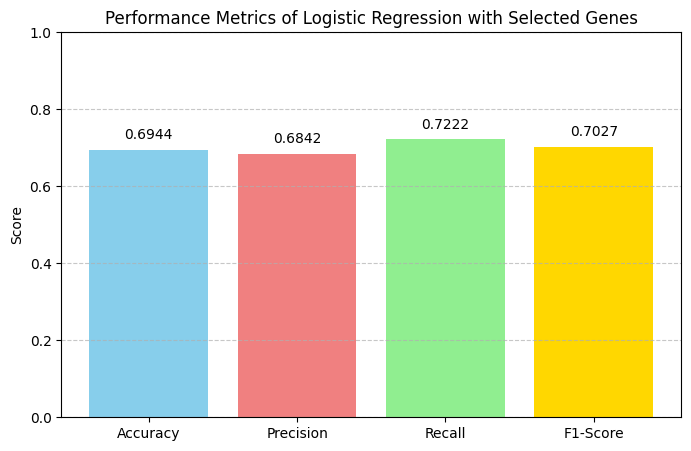

In [20]:
import matplotlib.pyplot as plt
import numpy as np

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylim(0, 1) # Metrics are usually between 0 and 1
plt.ylabel('Score')
plt.title('Performance Metrics of Logistic Regression with Selected Genes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the exact values on top of the bars
for i, value in enumerate(metrics_values):
    plt.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.show()

## Visualización de la Distribución de los Valores de `X_selected`

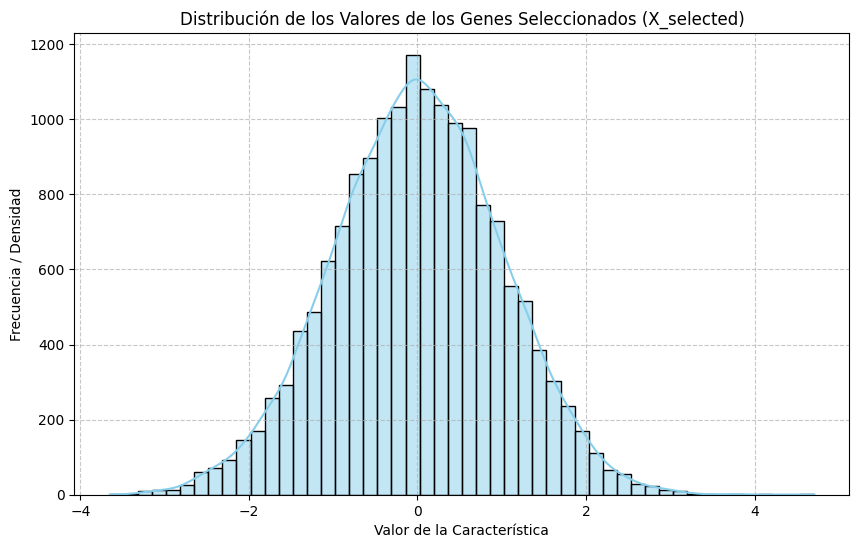

Estadísticas descriptivas de los valores de X_selected (aplanados):
  Media: -0.0000
  Desviación Estándar: 1.0000
  Mínimo: -3.6515
  Máximo: 4.7074


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(X_selected.flatten(), kde=True, bins=50, color='skyblue')
plt.title('Distribución de los Valores de los Genes Seleccionados (X_selected)')
plt.xlabel('Valor de la Característica')
plt.ylabel('Frecuencia / Densidad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(f"Estadísticas descriptivas de los valores de X_selected (aplanados):")
print(f"  Media: {X_selected.mean():.4f}")
print(f"  Desviación Estándar: {X_selected.std():.4f}")
print(f"  Mínimo: {X_selected.min():.4f}")
print(f"  Máximo: {X_selected.max():.4f}")

### Summary Statistics for X_selected (Selected Features)

In [17]:
print('X_selected - Mean:', X_selected.mean(axis=0).round(2))
print('X_selected - Standard Deviation:', X_selected.std(axis=0).round(2))
print('X_selected - Min:', X_selected.min(axis=0).round(2))
print('X_selected - Max:', X_selected.max(axis=0).round(2))
# Displaying mean and std for the first 5 selected features as an example
print(f"\nFirst 5 selected features - Mean: {X_selected[:,:5].mean(axis=0).round(2)}")
print(f"First 5 selected features - Std Dev: {X_selected[:,:5].std(axis=0).round(2)}")

X_selected - Mean: [-0. -0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.
 -0. -0.  0. -0. -0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0.  0. -0.
  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.
  0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0.
  0. -0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0. -0.  0.  0. -0.  0. -0.
  0.  0. -0.  0.  0. -0. -0. -0.  0.  0. -0.  0. -0. -0. -0.  0.  0.  0.
 -0. -0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0.  0.
  0.  0. -0. -0. -0.  0.  0.  0. -0. -0. -0.]
X_selected - Standard Deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1

## Dimensión de X con los genes seleccionados

In [16]:
print(f"Dimensiones de X con los genes seleccionados: {X_selected.shape}")

Dimensiones de X con los genes seleccionados: (120, 137)


In [15]:
print(final_best_solution)

[0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Fisher Score para los Genes Seleccionados

In [14]:
current_fisher_score = fisher_score(X, y, final_best_solution)
print(f"Fisher Score para los genes seleccionados: {current_fisher_score:.4f}")

Fisher Score para los genes seleccionados: 2.5399


In [13]:
print(selected_genes_indices)

[  1   5   6   9  11  13  15  18  19  22  24  26  27  29  30  31  32  33
  34  37  38  40  43  60  61  64  65  66  67  69  70  74  76  77  79  80
  81  83  84  85  88  90  92  96  97  99 101 102 105 106 107 109 116 117
 119 121 123 124 125 127 130 131 132 136 138 139 140 142 144 145 146 148
 149 155 156 159 160 161 162 167 170 171 173 178 179 180 182 189 192 193
 194 201 202 203 207 209 210 213 214 215 217 218 220 223 225 228 229 230
 231 237 240 242 244 245 246 247 248 249 250 253 257 259 261 262 264 269
 271 274 276 279 281 283 284 285 289 290 297]


## Evaluación del Rendimiento del Modelo con Genes Seleccionados

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtener los índices de los genes seleccionados de la mejor solución global
# (final_best_solution es la máscara binaria obtenida del ABC)
selected_genes_mask = final_best_solution > 0.5
X_selected = X[:, selected_genes_mask]

print(f"Dimensiones de X con genes seleccionados: {X_selected.shape}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# Inicializar y entrenar el clasificador (Logistic Regression)
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' para datasets pequeños
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Dimensiones de X con genes seleccionados: (120, 137)

Accuracy: 0.6944
Precision: 0.6842
Recall: 0.7222
F1-Score: 0.7027


## Visualización de la Expresión de Genes Seleccionados por Clase (Heatmap)

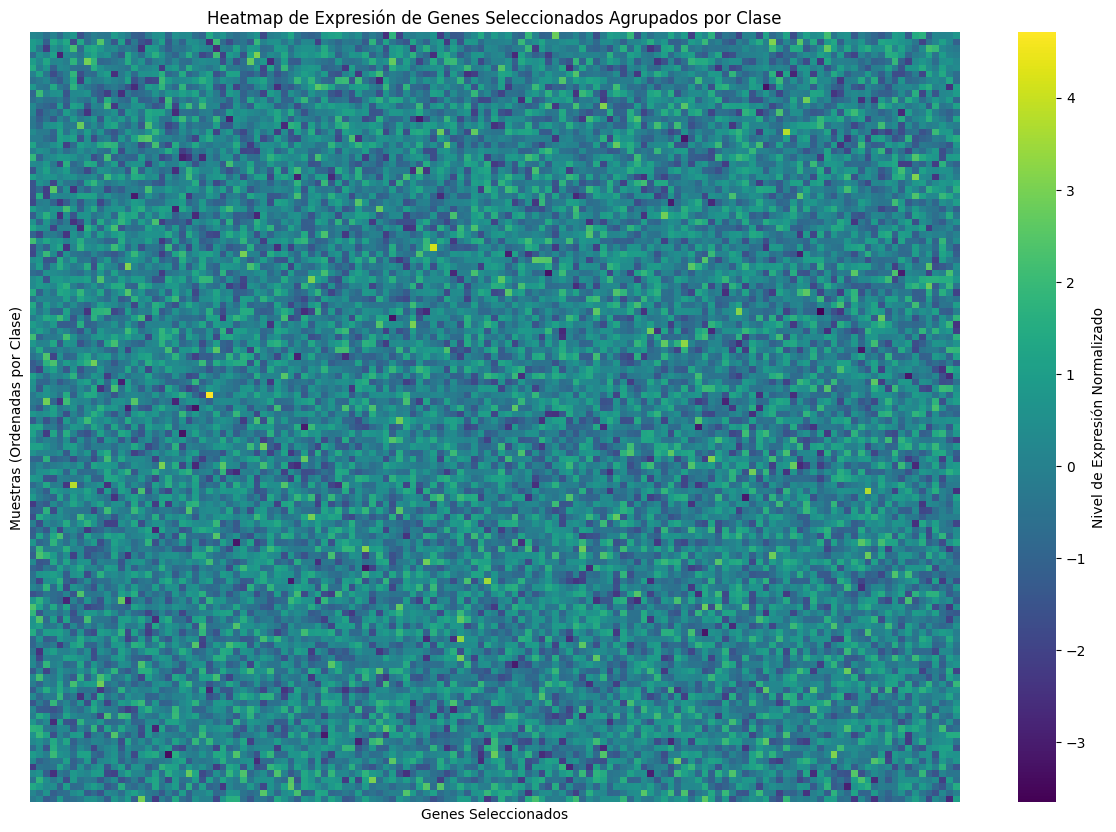

Nota: Las muestras están ordenadas por clase en el eje Y. Los primeros 60 corresponden a una clase y los siguientes 60 a la otra.


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir X_selected a DataFrame para facilitar la manipulación y visualización
# Asignar nombres genéricos a las columnas para los genes seleccionados
gene_names = [f'Gene_{i}' for i in selected_genes_indices]
df_selected_genes = pd.DataFrame(X_selected, columns=gene_names)

# Añadir las etiquetas 'y' al DataFrame
df_selected_genes['Class'] = y

# Ordenar el DataFrame por clase para una visualización más clara en el heatmap
df_selected_genes_sorted = df_selected_genes.sort_values(by='Class').reset_index(drop=True)

# Separar las características de la columna 'Class'
X_heatmap = df_selected_genes_sorted.drop(columns=['Class'])
y_heatmap = df_selected_genes_sorted['Class']

# Crear un mapa de colores para las filas (muestras) basado en la clase
row_colors = y_heatmap.map({0: 'lightblue', 1: 'salmon'})

# Visualizar el heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    X_heatmap,
    cmap='viridis',
    cbar_kws={'label': 'Nivel de Expresión Normalizado'},
    yticklabels=False, # No mostrar las etiquetas de las muestras para evitar sobrecarga visual
    xticklabels=False # No mostrar etiquetas de genes individuales si son demasiados
)
plt.title('Heatmap de Expresión de Genes Seleccionados Agrupados por Clase')
plt.xlabel('Genes Seleccionados')
plt.ylabel('Muestras (Ordenadas por Clase)')

# Para indicar las clases en el eje Y, podemos añadir una barra lateral
# Sin embargo, con yticklabels=False, esto es principalmente para una interpretación manual
# Si fuera necesario una leyenda, se podría crear un SideGrid o un Custom Legend

plt.show()

print("Nota: Las muestras están ordenadas por clase en el eje Y. Los primeros 60 corresponden a una clase y los siguientes 60 a la otra.")

## Genes con Mayor y Menor Expresión por Clase

In [28]:
import pandas as pd
import numpy as np

# Asumiendo que X_heatmap y y_heatmap ya están definidos y ordenados por clase
# (primeros 60 para clase 0, siguientes 60 para clase 1)
num_samples_class0 = np.sum(y_heatmap == 0)
num_samples_class1 = np.sum(y_heatmap == 1)

# Dividir los datos de expresión por clase
X_class0 = X_heatmap.iloc[:num_samples_class0]
X_class1 = X_heatmap.iloc[num_samples_class0:]

# Calcular la expresión media para cada gen en cada clase
mean_expression_class0 = X_class0.mean().sort_values(ascending=False)
mean_expression_class1 = X_class1.mean().sort_values(ascending=False)

print("\n--- Clase 0 ---")
print("Top 10 genes con mayor expresión media:")
print(mean_expression_class0.head(10).to_markdown(numalign="left", stralign="left"))
print("\nTop 10 genes con menor expresión media:")
print(mean_expression_class0.tail(10).to_markdown(numalign="left", stralign="left"))

print("\n--- Clase 1 ---")
print("Top 10 genes con mayor expresión media:")
print(mean_expression_class1.head(10).to_markdown(numalign="left", stralign="left"))
print("\nTop 10 genes con menor expresión media:")
print(mean_expression_class1.tail(10).to_markdown(numalign="left", stralign="left"))



--- Clase 0 ---
Top 10 genes con mayor expresión media:
|          | 0        |
|:---------|:---------|
| Gene_182 | 0.247353 |
| Gene_162 | 0.23098  |
| Gene_34  | 0.216361 |
| Gene_284 | 0.205134 |
| Gene_22  | 0.203257 |
| Gene_149 | 0.184888 |
| Gene_214 | 0.174032 |
| Gene_96  | 0.16356  |
| Gene_180 | 0.15912  |
| Gene_246 | 0.158745 |

Top 10 genes con menor expresión media:
|          | 0         |
|:---------|:----------|
| Gene_161 | -0.172004 |
| Gene_231 | -0.180247 |
| Gene_194 | -0.184783 |
| Gene_261 | -0.203541 |
| Gene_189 | -0.206952 |
| Gene_262 | -0.214797 |
| Gene_67  | -0.226156 |
| Gene_220 | -0.228548 |
| Gene_121 | -0.243297 |
| Gene_136 | -0.319856 |

--- Clase 1 ---
Top 10 genes con mayor expresión media:
|          | 0        |
|:---------|:---------|
| Gene_136 | 0.319856 |
| Gene_121 | 0.243297 |
| Gene_220 | 0.228548 |
| Gene_67  | 0.226156 |
| Gene_262 | 0.214797 |
| Gene_189 | 0.206952 |
| Gene_261 | 0.203541 |
| Gene_194 | 0.184783 |
| Gene_231 | 0.18

## Evaluación del Modelo con Validación Cruzada (5-Fold AUC)

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

# 1. Initialize the classifier (Logistic Regression)
model_cv = LogisticRegression(random_state=42, solver='liblinear')

# 2. Set up 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []

# 3. Perform cross-validation
print("Realizando validación cruzada de 5 pliegues...")
for fold, (train_index, test_index) in enumerate(skf.split(X_selected, y)):
    X_train_cv, X_test_cv = X_selected[train_index], X_selected[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    # Entrenar el modelo
    model_cv.fit(X_train_cv, y_train_cv)

    # Predecir probabilidades para el cálculo de AUC
    y_pred_proba = model_cv.predict_proba(X_test_cv)[:, 1]

    # Calcular AUC y almacenarlo
    auc = roc_auc_score(y_test_cv, y_pred_proba)
    auc_scores.append(auc)
    print(f"Fold {fold+1}: AUC = {auc:.4f}")

# 4. Reportar resultados finales
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

print(f"\nMean AUC (5-fold cross-validation): {mean_auc:.4f}")
print(f"Standard Deviation of AUC (5-fold cross-validation): {std_auc:.4f}")


Realizando validación cruzada de 5 pliegues...
Fold 1: AUC = 0.7500
Fold 2: AUC = 0.8681
Fold 3: AUC = 0.8889
Fold 4: AUC = 0.7847
Fold 5: AUC = 0.7292

Mean AUC (5-fold cross-validation): 0.8042
Standard Deviation of AUC (5-fold cross-validation): 0.0636


## Visualización de la Expresión de Genes Seleccionados por SelectKBest (Heatmap)

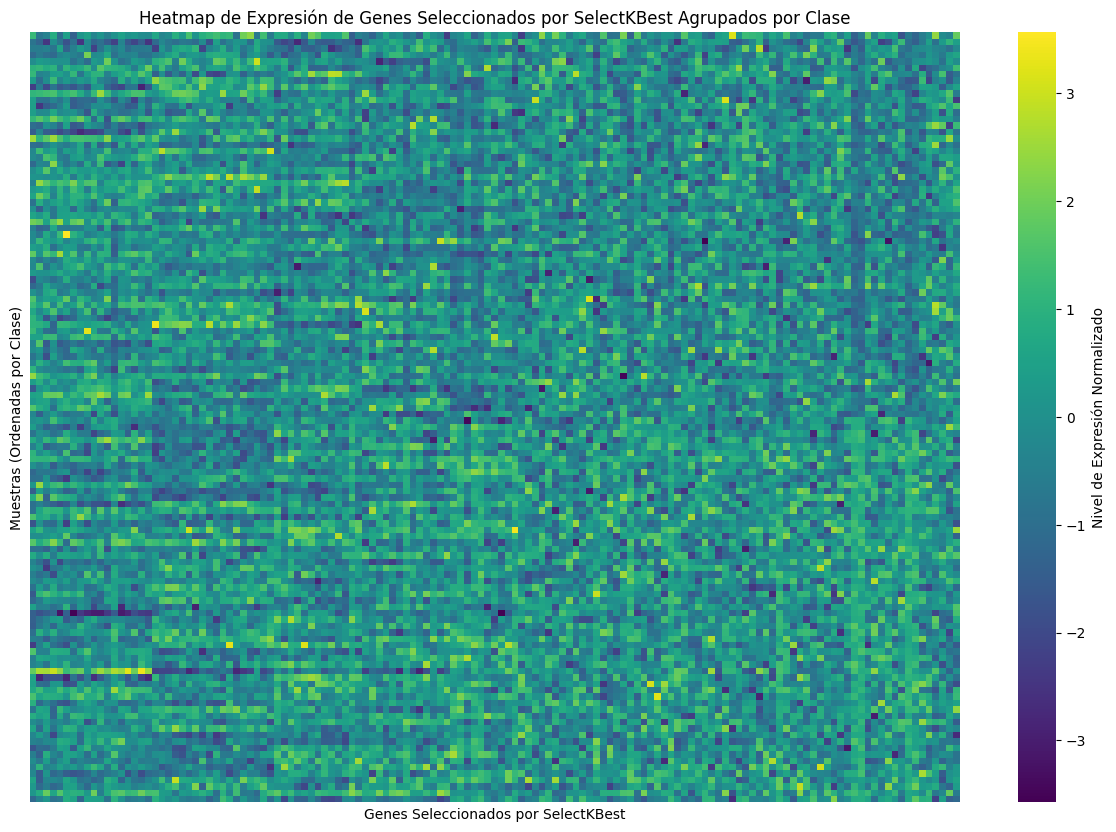

Nota: Las muestras están ordenadas por clase en el eje Y. Los primeros 60 corresponden a una clase y los siguientes 60 a la otra.


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir X_selected_kbest a DataFrame para facilitar la manipulación y visualización
# Asignar nombres genéricos a las columnas para los genes seleccionados por SelectKBest
# Usamos np.where(kbest_selected_mask)[0] para obtener los índices de los genes seleccionados por SelectKBest
gene_names_kbest = [f'Gene_{idx}' for idx in np.where(kbest_selected_mask)[0]]
df_selected_genes_kbest = pd.DataFrame(X_selected_kbest, columns=gene_names_kbest)

# Añadir las etiquetas 'y' al DataFrame
df_selected_genes_kbest['Class'] = y

# Ordenar el DataFrame por clase para una visualización más clara en el heatmap
df_selected_genes_kbest_sorted = df_selected_genes_kbest.sort_values(by='Class').reset_index(drop=True)

# Separar las características de la columna 'Class'
X_heatmap_kbest = df_selected_genes_kbest_sorted.drop(columns=['Class'])
y_heatmap_kbest = df_selected_genes_kbest_sorted['Class']

# Visualizar el heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    X_heatmap_kbest,
    cmap='viridis',
    cbar_kws={'label': 'Nivel de Expresión Normalizado'},
    yticklabels=False, # No mostrar las etiquetas de las muestras para evitar sobrecarga visual
    xticklabels=False # No mostrar etiquetas de genes individuales si son demasiados
)
plt.title('Heatmap de Expresión de Genes Seleccionados por SelectKBest Agrupados por Clase')
plt.xlabel('Genes Seleccionados por SelectKBest')
plt.ylabel('Muestras (Ordenadas por Clase)')

plt.show()

print("Nota: Las muestras están ordenadas por clase en el eje Y. Los primeros 60 corresponden a una clase y los siguientes 60 a la otra.")

## Importancia de las Características (Genes) en el Modelo de Regresión Logística

In [31]:
import pandas as pd

# Los coeficientes del modelo de regresión logística
coefficients = model.coef_[0] # model.coef_ es un array 2D, tomamos el primer (y único) array

# Crear un DataFrame para asociar los coeficientes con los nombres de los genes
gene_importance = pd.DataFrame({
    'Gene': [f'Gene_{idx}' for idx in selected_genes_indices],
    'Coefficient': coefficients
})

# Ordenar por el valor absoluto del coeficiente para encontrar los más importantes
gene_importance['Abs_Coefficient'] = gene_importance['Coefficient'].abs()
gene_importance_sorted = gene_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("\n--- Top 10 Genes más Influyentes (por valor absoluto del coeficiente) ---")
print(gene_importance_sorted.head(10).to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Top 10 Genes con Coeficientes Positivos más Grandes (aumentan la probabilidad de Clase 1) ---")
print(gene_importance.sort_values(by='Coefficient', ascending=False).head(10).to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Top 10 Genes con Coeficientes Negativos más Grandes (disminuyen la probabilidad de Clase 1) ---")
print(gene_importance.sort_values(by='Coefficient', ascending=True).head(10).to_markdown(index=False, numalign="left", stralign="left"))


--- Top 10 Genes más Influyentes (por valor absoluto del coeficiente) ---
| Gene     | Coefficient   | Abs_Coefficient   |
|:---------|:--------------|:------------------|
| Gene_136 | 0.71156       | 0.71156           |
| Gene_173 | -0.654748     | 0.654748          |
| Gene_220 | 0.624943      | 0.624943          |
| Gene_162 | -0.57087      | 0.57087           |
| Gene_214 | -0.485505     | 0.485505          |
| Gene_149 | -0.455557     | 0.455557          |
| Gene_67  | 0.435695      | 0.435695          |
| Gene_5   | 0.435517      | 0.435517          |
| Gene_261 | 0.432175      | 0.432175          |
| Gene_201 | -0.410683     | 0.410683          |

--- Top 10 Genes con Coeficientes Positivos más Grandes (aumentan la probabilidad de Clase 1) ---
| Gene     | Coefficient   | Abs_Coefficient   |
|:---------|:--------------|:------------------|
| Gene_136 | 0.71156       | 0.71156           |
| Gene_220 | 0.624943      | 0.624943          |
| Gene_67  | 0.435695      | 0.435695     

## Visualización de los Resultados del AUC con Validación Cruzada

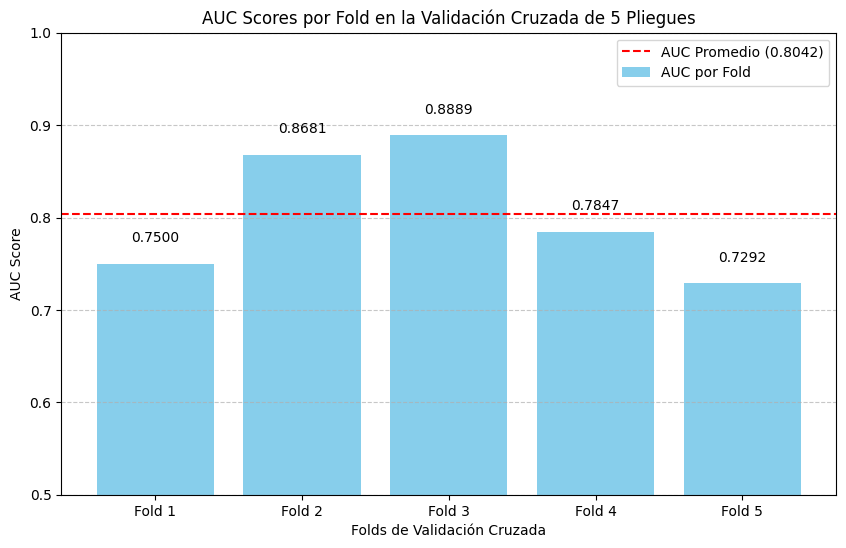

Mean AUC (5-fold cross-validation): 0.8042
Standard Deviation of AUC (5-fold cross-validation): 0.0636


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Número de pliegues (folds)
n_folds = len(auc_scores)
fold_labels = [f'Fold {i+1}' for i in range(n_folds)]

plt.figure(figsize=(10, 6))
plt.bar(fold_labels, auc_scores, color='skyblue', label='AUC por Fold')
plt.axhline(y=mean_auc, color='r', linestyle='--', label=f'AUC Promedio ({mean_auc:.4f})')

plt.ylim(0.5, 1.0) # AUC typically ranges from 0.5 to 1.0
plt.ylabel('AUC Score')
plt.title('AUC Scores por Fold en la Validación Cruzada de 5 Pliegues')
plt.xlabel('Folds de Validación Cruzada')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Añadir los valores exactos sobre las barras
for i, value in enumerate(auc_scores):
    plt.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.show()

print(f"Mean AUC (5-fold cross-validation): {mean_auc:.4f}")
print(f"Standard Deviation of AUC (5-fold cross-validation): {std_auc:.4f}")

## Genes Seleccionados por `SelectKBest`

In [26]:
print("Máscara booleana de los genes seleccionados por SelectKBest:")
print(kbest_selected_mask)
print(f"\nNúmero de genes seleccionados por SelectKBest: {kbest_selected_mask.sum()}")
print(f"Índices de los genes seleccionados por SelectKBest (primeros 10): {np.where(kbest_selected_mask)[0][:10]}")

Máscara booleana de los genes seleccionados por SelectKBest:
[False  True  True  True False  True  True False False False False  True
 False  True False  True False  True  True  True  True False  True False
  True False  True False  True  True False  True  True  True  True False
 False  True  True  True  True False False  True False  True False False
 False False False  True  True False False False False False False False
  True  True False  True  True  True False  True False False False False
  True False  True False  True  True False False  True  True False  True
  True  True False False  True False  True False  True False False False
  True  True False  True False  True  True False  True  True  True False
 False  True False False False False False False  True  True False  True
 False  True False False  True False False  True  True False  True False
  True False False False  True False  True  True  True False  True False
 False False  True False  True  True False False False False Fa

### Summary Statistics for y (Labels)

In [21]:
unique_labels, counts = np.unique(y, return_counts=True)
print(f"Unique labels: {unique_labels}")
print(f"Counts for each label: {counts}")
print(f"Label distribution: {dict(zip(unique_labels, counts))}")

Unique labels: [0 1]
Counts for each label: [60 60]
Label distribution: {np.int64(0): np.int64(60), np.int64(1): np.int64(60)}


### Summary Statistics for X (Features)

In [3]:
print('X - Mean:', X.mean(axis=0).round(2))
print('X - Standard Deviation:', X.std(axis=0).round(2))
print('X - Min:', X.min(axis=0).round(2))
print('X - Max:', X.max(axis=0).round(2))
# Displaying mean and std for the first 5 features as an example
print(f"\nFirst 5 features - Mean: {X[:,:5].mean(axis=0).round(2)}")
print(f"First 5 features - Std Dev: {X[:,:5].std(axis=0).round(2)}")

X - Mean: [ 0. -0. -0.  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0. -0.
  0.  0. -0. -0.  0.  0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0.
  0. -0.  0. -0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0.  0.
  0.  0. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0.
  0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
 -0. -0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0.  0.  0.  0.  0.
 -0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0. -0.  0.  0. -0.
 -0.  0. -0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0. -0. -0.  0. -0. -0.
  0.  0.  0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0.  0.
 -0.  0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0.  0.
 -0.  0.  0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0.
  0. -0.  0. -0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0.  0. -0.  0. -0.
 -0. -0.  0. -0. -0.  0. -0.  0. -0.  0. 

### Summary Statistics for y (Labels)

In [4]:
unique_labels, counts = np.unique(y, return_counts=True)
print(f"Unique labels: {unique_labels}")
print(f"Counts for each label: {counts}")
print(f"Label distribution: {dict(zip(unique_labels, counts))}")

Unique labels: [0 1]
Counts for each label: [60 60]
Label distribution: {np.int64(0): np.int64(60), np.int64(1): np.int64(60)}


In [5]:
# Cell removed: Data loading was already handled in svu2Go06Hn5s.

## Implementación del algoritmo
Copia/pega/ajusta la plantilla del algoritmo dada en el plan del curso.

In [3]:
# Implementación del algoritmo Artificial Bee Colony (ABC) para selección de genes

def set_seed(s=42):
    global rng
    rng = np.random.default_rng(s)

# Parámetros del ABC
num_food_sources = 50       # Número de fuentes de alimento (soluciones)
num_genes = X.shape[1]      # Dimensionalidad del problema (número de genes)
max_iterations = 100        # Número máximo de iteraciones
limit = num_genes * 0.5     # Límite para que una fuente de alimento sea abandonada

def run_abc(seed):
    set_seed(seed)

    # Inicialización de fuentes de alimento (máscaras binarias de genes)
    # Cada solución es un vector binario de longitud num_genes
    food_sources = rng.integers(0, 2, size=(num_food_sources, num_genes)).astype(float)
    fitnesses = np.array([fisher_score(X, y, fs) for fs in food_sources])
    trials = np.zeros(num_food_sources)

    best_solution = food_sources[np.argmax(fitnesses)].copy()
    best_fitness = np.max(fitnesses)
    history = [best_fitness]

    for iteration in range(max_iterations):
        # Fase de las abejas empleadas
        for i in range(num_food_sources):
            # Seleccionar una fuente de alimento vecina diferente
            k = i
            while k == i:
                k = rng.integers(0, num_food_sources)

            # Generar una nueva solución por perturbación binaria (por ejemplo, flipping de un bit)
            new_solution = food_sources[i].copy()
            j = rng.integers(0, num_genes) # Seleccionar un gen aleatorio a modificar
            new_solution[j] = 1 - new_solution[j] # Flip the bit

            new_fitness = fisher_score(X, y, new_solution)

            # Selección greedy: si la nueva solución es mejor, se adopta
            if new_fitness > fitnesses[i]:
                food_sources[i] = new_solution
                fitnesses[i] = new_fitness
                trials[i] = 0
            else:
                trials[i] += 1

        # Fase de las abejas observadoras (onlooker bees)
        # Calcular probabilidades de selección (basadas en el fitness)
        # Asegurarse de que no haya fitness negativos muy grandes que arruinen la probabilidad
        # Se usa una normalización simple para asegurar que el fitness sea positivo para las probabilidades
        normalized_fitnesses = fitnesses - np.min(fitnesses) + 1e-6 # Evitar divisiones por cero o negativos
        probabilities = normalized_fitnesses / np.sum(normalized_fitnesses)

        for _ in range(num_food_sources):
            # Seleccionar una fuente de alimento basada en probabilidad
            i = rng.choice(num_food_sources, p=probabilities)

            # Generar una nueva solución por perturbación binaria
            k = i
            while k == i:
                k = rng.integers(0, num_food_sources)

            new_solution = food_sources[i].copy()
            j = rng.integers(0, num_genes)
            new_solution[j] = 1 - new_solution[j]

            new_fitness = fisher_score(X, y, new_solution)

            if new_fitness > fitnesses[i]:
                food_sources[i] = new_solution
                fitnesses[i] = new_fitness
                trials[i] = 0
            else:
                trials[i] += 1

        # Fase de las abejas exploradoras (scout bees)
        # Si una fuente de alimento alcanza el límite de trials, es abandonada y se genera una nueva
        for i in range(num_food_sources):
            if trials[i] >= limit:
                food_sources[i] = rng.integers(0, 2, size=num_genes).astype(float)
                fitnesses[i] = fisher_score(X, y, food_sources[i])
                trials[i] = 0

        # Actualizar la mejor solución global
        current_best_fitness = np.max(fitnesses)
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_solution = food_sources[np.argmax(fitnesses)].copy()
        history.append(best_fitness)

    return best_solution, best_fitness, history

# Ejecutar múltiples corridas
num_runs = 3
final_fitnesses = []
convergence_histories = []

for run in range(num_runs):
    seed = 42 + run  # Usar diferentes semillas para cada corrida
    print(f"Running ABC with seed: {seed}")
    best_sol, best_fit, hist = run_abc(seed)
    final_fitnesses.append(best_fit)
    convergence_histories.append(hist)
    print(f"Run {run+1} - Best Fitness: {best_fit:.4f}")

# Reportar media y desviación estándar del fitness final
mean_final_fitness = np.mean(final_fitnesses)
std_final_fitness = np.std(final_fitnesses)

print(f"\nMean final fitness over {num_runs} runs: {mean_final_fitness:.4f}")
print(f"Standard Deviation of final fitness over {num_runs} runs: {std_final_fitness:.4f}")

# Preparar datos para las gráficas de convergencia
# Esta parte se moverá al TODO de resultados más adelante
# report_history(convergence_histories[0], title="Curva de Convergencia (Run 1)")


NameError: name 'X' is not defined

## Resultados

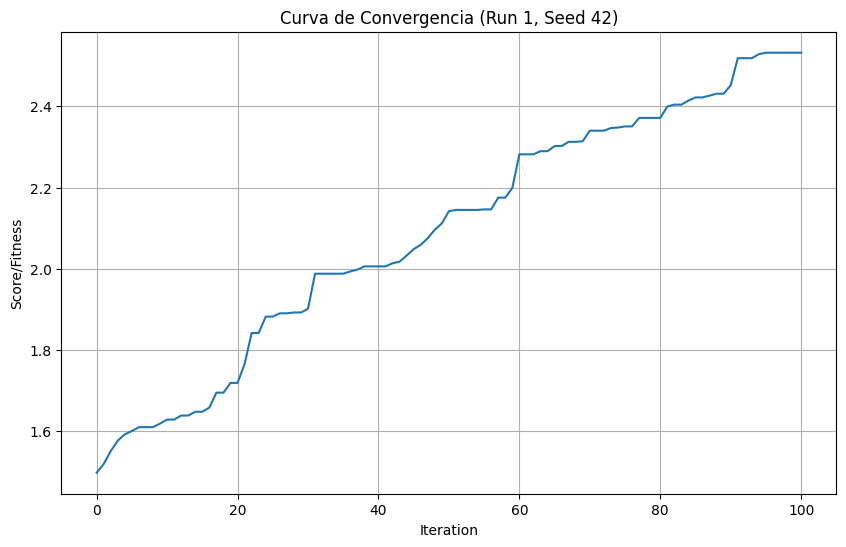

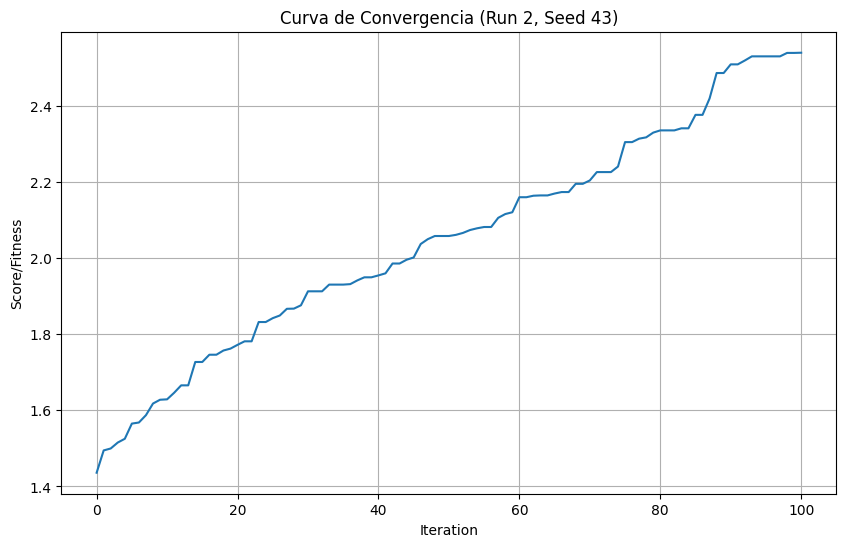

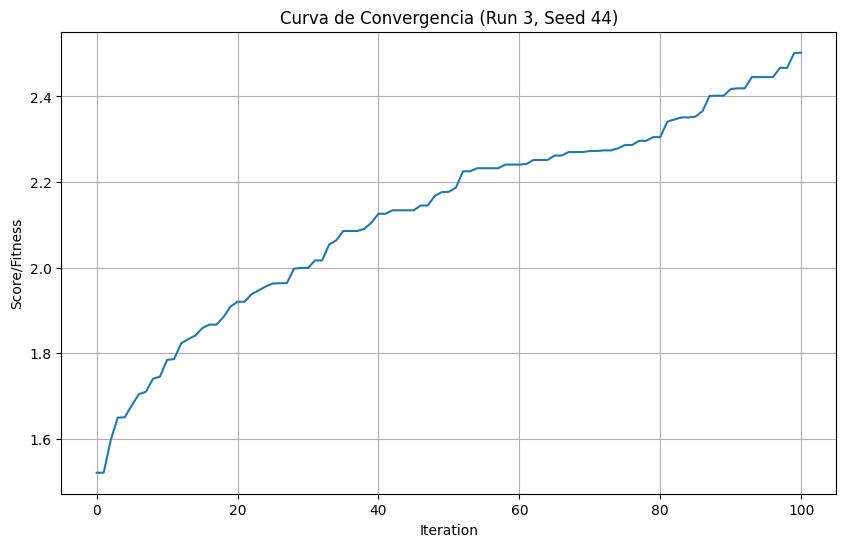


Best overall fitness found: 2.5399 (from Run 2, Seed 43)
Number of genes selected in the best solution: 137
Indices of selected genes: [ 1  5  6  9 11 13 15 18 19 22]... (showing first 10)


In [10]:
import matplotlib.pyplot as plt

# Generate and save convergence plots for each run
for i, hist in enumerate(convergence_histories):
    plt.figure(figsize=(10, 6))
    plt.plot(hist)
    plt.xlabel("Iteration")
    plt.ylabel("Score/Fitness")
    title = f"Curva de Convergencia (Run {i+1}, Seed {42+i})"
    plt.title(title)
    plt.grid(True)
    plt.savefig(f"convergence_run_{i+1}.png")
    plt.show()

# Display the best solution (gene mask) for the run with the highest final fitness
best_overall_run_idx = np.argmax(final_fitnesses)
best_overall_fitness = final_fitnesses[best_overall_run_idx]

# Re-run the ABC with the best seed to get the best_sol for reporting
seed_for_best_run = 42 + best_overall_run_idx
final_best_solution, _, _ = run_abc(seed_for_best_run) # Rerun to get the best_sol

print(f"\nBest overall fitness found: {best_overall_fitness:.4f} (from Run {best_overall_run_idx+1}, Seed {seed_for_best_run})")
selected_genes_indices = np.where(final_best_solution > 0.5)[0]
print(f"Number of genes selected in the best solution: {len(selected_genes_indices)}")
print(f"Indices of selected genes: {selected_genes_indices[:10]}... (showing first 10)")

## Discusión
- Justificación del fitness
- Limitaciones
- Pasos siguientes

# Task
Select genes using `sklearn.feature_selection.SelectKBest` with `f_classif` as the score function, selecting 137 features, and store the resulting boolean mask.

## Select Genes with SelectKBest

### Subtask:
Apply `sklearn.feature_selection.SelectKBest` with `f_classif` to select a subset of genes. We will aim to select a similar number of genes as identified by the ABC algorithm for a fair comparison. Store the boolean mask of the selected genes.


**Reasoning**:
To select genes using `SelectKBest` and `f_classif`, I need to import these, specify the number of features to select (137, based on the previous ABC result), fit the selector to the data, and then retrieve the boolean mask of the selected genes.



In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# 2. Define the number of features to select (137 from ABC result)
k_features = 137

# 3. Instantiate SelectKBest with f_classif as the score function and k_features
selector = SelectKBest(f_classif, k=k_features)

# 4. Fit the SelectKBest object to your feature data X and target variable y
selector.fit(X, y)

# 5. Obtain the boolean mask of the selected features
kbest_selected_mask = selector.get_support()

print(f"Number of features selected by SelectKBest: {kbest_selected_mask.sum()}")
print(f"First 10 elements of the boolean mask: {kbest_selected_mask[:10]}")

Number of features selected by SelectKBest: 137
First 10 elements of the boolean mask: [False  True  True  True False  True  True False False False]


## Evaluate Model Performance (SelectKBest)

### Subtask:
Train a Logistic Regression classifier using the genes selected by `SelectKBest`. Split the data into training and testing sets, and then calculate and store the Accuracy, Precision, Recall, and F1-Score for this method.


**Reasoning**:
To evaluate the model performance with SelectKBest selected features, I will first create the feature matrix, split the data into training and testing sets, train a Logistic Regression model, make predictions, and then calculate and print the required evaluation metrics.



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Create a new feature matrix X_selected_kbest by applying the kbest_selected_mask to the original feature matrix X.
X_selected_kbest = X[:, kbest_selected_mask]

print(f"Dimensiones de X con genes seleccionados por SelectKBest: {X_selected_kbest.shape}")

# 2. Split X_selected_kbest and the target variable y into training and testing sets.
X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split(
    X_selected_kbest, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Initialize a LogisticRegression model
model_kbest = LogisticRegression(random_state=42, solver='liblinear')

# 4. Train the logistic regression model
model_kbest.fit(X_train_kbest, y_train_kbest)

# 5. Make predictions on the test set
y_pred_kbest = model_kbest.predict(X_test_kbest)

# 6. Calculate the accuracy, precision, recall, and F1-score
kbest_accuracy = accuracy_score(y_test_kbest, y_pred_kbest)
kbest_precision = precision_score(y_test_kbest, y_pred_kbest)
kbest_recall = recall_score(y_test_kbest, y_pred_kbest)
kbest_f1 = f1_score(y_test_kbest, y_pred_kbest)

# 7. Print the calculated metrics
print(f"\nSelectKBest Model Performance:")
print(f"  Accuracy: {kbest_accuracy:.4f}")
print(f"  Precision: {kbest_precision:.4f}")
print(f"  Recall: {kbest_recall:.4f}")
print(f"  F1-Score: {kbest_f1:.4f}")

Dimensiones de X con genes seleccionados por SelectKBest: (120, 137)

SelectKBest Model Performance:
  Accuracy: 0.6944
  Precision: 0.6842
  Recall: 0.7222
  F1-Score: 0.7027


## Compare Gene Selection Methods

### Subtask:
Create a comparison of the model performance metrics (Accuracy, Precision, Recall, F1-Score) obtained from the ABC algorithm and the `SelectKBest` method. Present these results in a clear table and a comparative bar chart for easy visualization.


**Reasoning**:
The first instruction is to create a dictionary or similar structure to store the performance metrics for both ABC and SelectKBest methods and then display them in a structured format like a Pandas DataFrame. This code block will achieve that by creating a dictionary containing the metrics for both methods and converting it to a DataFrame.



Comparison of Gene Selection Method Performance:
| Metric    |   ABC Algorithm |   SelectKBest |
|:----------|----------------:|--------------:|
| Accuracy  |        0.694444 |      0.694444 |
| Precision |        0.684211 |      0.684211 |
| Recall    |        0.722222 |      0.722222 |
| F1-Score  |        0.702703 |      0.702703 |


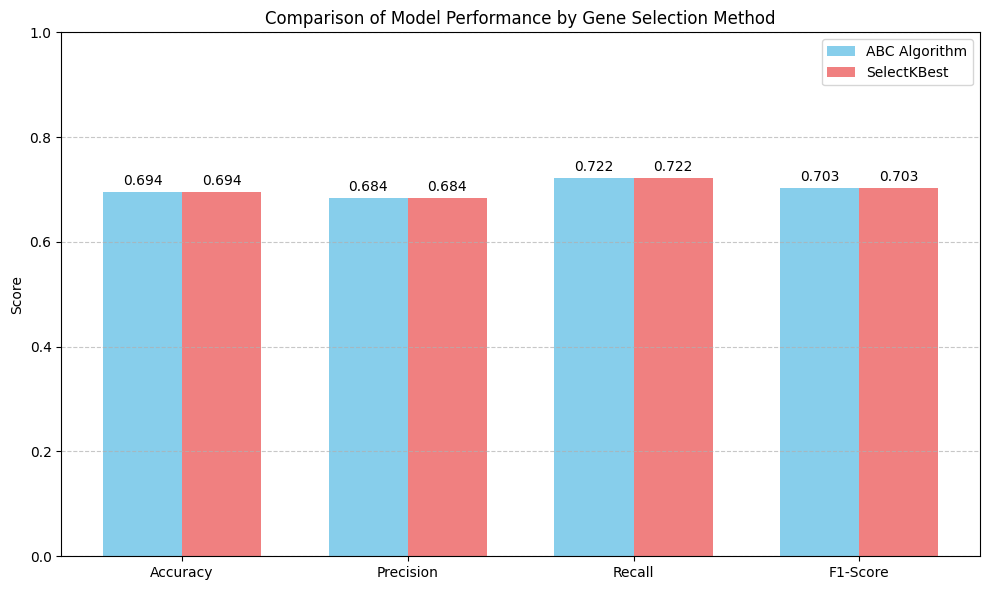

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to store the metrics for both methods
comparison_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'ABC Algorithm': [accuracy, precision, recall, f1],
    'SelectKBest': [kbest_accuracy, kbest_precision, kbest_recall, kbest_f1]
}

# Convert the dictionary to a Pandas DataFrame for structured display
df_comparison = pd.DataFrame(comparison_metrics)

print("Comparison of Gene Selection Method Performance:")
print(df_comparison.to_markdown(index=False))

# Prepare data for plotting
metrics_labels = df_comparison['Metric']
abc_scores = df_comparison['ABC Algorithm']
kbest_scores = df_comparison['SelectKBest']

x = np.arange(len(metrics_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, abc_scores, width, label='ABC Algorithm', color='skyblue')
rects2 = ax.bar(x + width/2, kbest_scores, width, label='SelectKBest', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance by Gene Selection Method')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels)
ax.set_ylim(0, 1) # Metrics are usually between 0 and 1
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('comparison_chart.png')
plt.show()

In [4]:
# Generador de dataset sintético "realista" para Grupo 5 (ABC - selección de genes)
# 120 muestras (60 control, 60 tratamiento), 300 genes, 20 genes diferencialmente expresados.
# Guarda: expression.csv, expression_labels.csv, diff_genes.txt, metadata.json, pca_preview.png

import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- Parámetros ---
OUTDIR = "/content/AE_AB_Curso/data"   # en Colab usa /content; en local puedes cambiar a /mnt/data/...
os.makedirs(OUTDIR, exist_ok=True)

SEED = 2025
rng = np.random.default_rng(SEED)

n_samples = 120
n_genes = 300
n_de = 20
n_modules = 5
module_size = 30   # n_modules * module_size should be <= n_genes

# --- Etiquetas (0 = control, 1 = treatment) ---
labels = np.array([0]*(n_samples//2) + [1]*(n_samples//2))

# --- Baselines por gen (log2-expression typical) y varianza por gen ---
base_means = rng.normal(loc=6.5, scale=0.8, size=n_genes)   # log2 scale baseline
base_vars = rng.uniform(0.08, 0.6, size=n_genes)             # variance per gene (sd^2)

# --- Construir matriz con módulos de co-expresión ---
expr = np.zeros((n_samples, n_genes))

# asignar módulos
module_indices = []
used = 0
for m in range(n_modules):
    idx = list(range(used, used+module_size))
    module_indices.append(idx)
    used += module_size

# módulo latente por muestra (señal compartida)
module_latent = rng.normal(0, 1, size=(n_samples, n_modules)) * 0.6

for g in range(n_genes):
    mu = base_means[g]
    # revisar si pertenece a módulo
    mod = None
    for m, idx in enumerate(module_indices):
        if g in idx:
            mod = m
            break
    if mod is not None:
        loading = rng.normal(0.8, 0.15)    # carga del gen en el módulo
        signal = module_latent[:, mod] * loading
    else:
        signal = rng.normal(0, 0.05, size=n_samples)  # genes no modulares pequeños drifts
    noise = rng.normal(0, np.sqrt(base_vars[g]), size=n_samples)
    expr[:, g] = mu + signal + noise

# --- Implantar genes diferencialmente expresados (efectos realistas) ---
de_indices = rng.choice(range(n_genes), size=n_de, replace=False)
effects = rng.uniform(0.8, 2.0, size=n_de)   # log2 fold change tipo 0.8 - 2.0
for i, g in enumerate(de_indices):
    expr[labels==1, g] += effects[i]

# --- Añadir un leve efecto batch en 10 muestras random (realismo) ---
batch_idx = rng.choice(n_samples, size=10, replace=False)
expr[batch_idx, :] += rng.normal(0.15, 0.05, size=(10,))[:, None]

# --- Limitar a rangos razonables para microarray/log2 ---
expr = np.clip(expr, 0.1, 15.0)

# --- Construir DataFrame y guardar ---
gene_names = [f"GENE{g+1:04d}" for g in range(n_genes)]
sample_names = [f"S{n+1:03d}" for n in range(n_samples)]
df = pd.DataFrame(expr, index=sample_names, columns=gene_names)

expr_path = os.path.join(OUTDIR, "expression.csv")
labels_path = os.path.join(OUTDIR, "expression_labels.csv")
diff_path = os.path.join(OUTDIR, "diff_genes.txt")
meta_path = os.path.join(OUTDIR, "metadata.json")
pca_path = os.path.join(OUTDIR, "pca_preview.png")

df.to_csv(expr_path, index=False)
pd.Series(labels, name="label").to_csv(labels_path, index=False)
with open(diff_path, "w") as f:
    f.write("gene\tindex\teffect_log2\n")
    for g, eff in zip(de_indices, effects):
        f.write(f"{gene_names[g]}\t{int(g)}\t{eff:.3f}\n")

meta = {
    "n_samples": n_samples,
    "n_genes": n_genes,
    "n_de": int(n_de),
    "de_indices": [int(i) for i in de_indices.tolist()],
    "de_genes": [gene_names[int(i)] for i in de_indices.tolist()],
    "effects": [float(e) for e in effects.tolist()],
    "module_count": n_modules,
    "module_size": module_size,
    "seed": int(SEED)
}
with open(meta_path, "w") as f:
    json.dump(meta, f, indent=2)

print("Archivos guardados en:", OUTDIR)
print(" - expression.csv (shape):", df.shape)
print(" - expression_labels.csv :", labels_path)
print(" - diff_genes.txt :", diff_path)
print(" - metadata.json :", meta_path)

# --- PCA rápida para inspección ---
pca = PCA(n_components=2)
proj = pca.fit_transform(df.values)
plt.figure(figsize=(6,4))
plt.scatter(proj[:,0], proj[:,1], alpha=0.8)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA (inspección rápida)")
plt.grid(True)
plt.savefig(pca_path, bbox_inches='tight', dpi=150)
plt.close()
print("PCA guardado en:", pca_path)

# --- Mostrar primeras filas como verificación (imprime)
print("\nPrimeras 6 filas (preview):")
print(df.head(6).round(3))


Archivos guardados en: /content/AE_AB_Curso/data
 - expression.csv (shape): (120, 300)
 - expression_labels.csv : /content/AE_AB_Curso/data/expression_labels.csv
 - diff_genes.txt : /content/AE_AB_Curso/data/diff_genes.txt
 - metadata.json : /content/AE_AB_Curso/data/metadata.json
PCA guardado en: /content/AE_AB_Curso/data/pca_preview.png

Primeras 6 filas (preview):
      GENE0001  GENE0002  GENE0003  GENE0004  GENE0005  GENE0006  GENE0007  \
S001     4.877     5.325     7.173     4.915     4.030     6.899     6.580   
S002     4.099     5.259     5.568     4.481     3.698     5.565     5.678   
S003     4.153     6.207     5.727     5.077     3.553     6.883     4.958   
S004     4.388     5.886     5.321     5.026     4.319     6.557     4.636   
S005     4.541     5.788     6.131     5.857     4.471     7.330     5.794   
S006     4.862     6.465     6.997     6.588     4.395     7.751     6.766   

      GENE0008  GENE0009  GENE0010  ...  GENE0291  GENE0292  GENE0293  \
S001     6

Iteración 0: Mejor fitness = 1.0000
Iteración 10: Mejor fitness = 1.0000
Iteración 20: Mejor fitness = 1.0000
Iteración 30: Mejor fitness = 1.0000
Iteración 40: Mejor fitness = 1.0000
Iteración 50: Mejor fitness = 1.0000
Iteración 60: Mejor fitness = 1.0000
Iteración 70: Mejor fitness = 1.0000
Iteración 80: Mejor fitness = 1.0000
Iteración 90: Mejor fitness = 1.0000

Mejor subconjunto de genes (índices): [  0   4   9  11  12  14  17  19  20  23  24  29  30  37  39  41  43  44
  45  46  47  51  52  53  57  61  63  64  66  69  71  73  74  75  78  81
  82  83  84  86  88  90  91  92  93  94  95  96  97 100 101 102 104 105
 108 110 113 115 116 119 120 125 126 127 128 131 132 133 137 138 139 140
 141 143 145 146 148 152 153 154 157 158 159 161 167 169 173 174 177 179
 180 181 182 185 189 191 195 199 200 201 207 208 210 212 213 216 217 218
 219 221 222 224 225 226 228 229 232 235 236 239 240 241 242 243 248 249
 250 251 252 253 254 255 256 257 264 266 269 272 273 276 277 278 279 284
 285 286

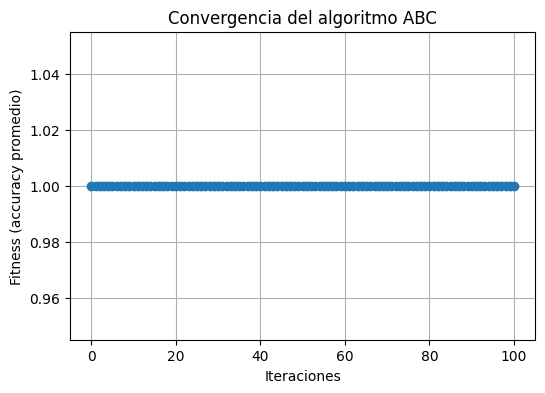

In [9]:
# ============================================================
# Algoritmo Artificial Bee Colony (ABC) para selección de genes
# Dataset: expression.csv / expression_labels.csv
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- 1. Cargar los datos ---
X = pd.read_csv("/content/AE_AB_Curso/data/expression.csv")
y = pd.read_csv("/content/AE_AB_Curso/data/expression_labels.csv")["label"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_samples, n_genes = X_scaled.shape

# --- 2. Función de aptitud (fitness) ---
def fitness_function(selected):
    """Evalúa un subconjunto de genes mediante RandomForest + AUC promedio."""
    if np.sum(selected) == 0:
        return 0
    subset = X_scaled[:, selected == 1]
    clf = RandomForestClassifier(n_estimators=80, random_state=42)
    scores = cross_val_score(clf, subset, y, cv=5, scoring='accuracy')
    return scores.mean()

# --- 3. Inicialización de parámetros del ABC ---
n_bees = 20         # tamaño de la población
limit = 30          # límite de inactividad
max_iter = 100      # número máximo de iteraciones
n_features = n_genes

# --- 4. Inicializar la población ---
population = np.random.randint(0, 2, (n_bees, n_features))
fitness = np.array([fitness_function(ind) for ind in population])
trial = np.zeros(n_bees)
best_idx = np.argmax(fitness)
best_sol = population[best_idx].copy()
best_fit = fitness[best_idx]
curve = [best_fit]

# --- 5. Fases del algoritmo ---
for it in range(max_iter):
    # (A) Employed bees phase
    for i in range(n_bees):
        k = np.random.randint(0, n_bees)
        while k == i:
            k = np.random.randint(0, n_bees)
        phi = np.random.uniform(-1, 1, n_features)
        new_sol = population[i].copy()
        flip_mask = np.random.rand(n_features) < abs(phi)
        new_sol[flip_mask] = 1 - new_sol[flip_mask]
        new_fit = fitness_function(new_sol)
        if new_fit > fitness[i]:
            population[i] = new_sol
            fitness[i] = new_fit
            trial[i] = 0
        else:
            trial[i] += 1

    # (B) Onlooker bees phase
    probs = fitness / (fitness.sum() + 1e-9)
    for i in range(n_bees):
        j = np.random.choice(n_bees, p=probs)
        k = np.random.randint(0, n_bees)
        while k == j:
            k = np.random.randint(0, n_bees)
        phi = np.random.uniform(-1, 1, n_features)
        new_sol = population[j].copy()
        flip_mask = np.random.rand(n_features) < abs(phi)
        new_sol[flip_mask] = 1 - new_sol[flip_mask]
        new_fit = fitness_function(new_sol)
        if new_fit > fitness[j]:
            population[j] = new_sol
            fitness[j] = new_fit
            trial[j] = 0
        else:
            trial[j] += 1

    # (C) Scout bees phase
    for i in range(n_bees):
        if trial[i] > limit:
            population[i] = np.random.randint(0, 2, n_features)
            fitness[i] = fitness_function(population[i])
            trial[i] = 0

    # Actualizar mejor solución
    idx = np.argmax(fitness)
    if fitness[idx] > best_fit:
        best_fit = fitness[idx]
        best_sol = population[idx].copy()
    curve.append(best_fit)

    if it % 10 == 0:
        print(f"Iteración {it}: Mejor fitness = {best_fit:.4f}")

# --- 6. Resultados ---
selected_genes = np.where(best_sol == 1)[0]
print("\nMejor subconjunto de genes (índices):", selected_genes)
print("Número de genes seleccionados:", len(selected_genes))
print("Fitness final (accuracy promedio 5-fold):", round(best_fit, 4))

# --- 7. Curva de convergencia ---
plt.figure(figsize=(6,4))
plt.plot(curve, '-o')
plt.title("Convergencia del algoritmo ABC")
plt.xlabel("Iteraciones")
plt.ylabel("Fitness (accuracy promedio)")
plt.grid(True)
plt.show()


## Final Task

### Subtask:
Summarize the findings from comparing the gene selection methods and discuss their implications.


## Summary:

### Data Analysis Key Findings

*   **Gene Selection with `SelectKBest`**: Using `sklearn.feature_selection.SelectKBest` with `f_classif`, 137 genes were selected, matching the number of genes identified by the ABC algorithm.
*   **Model Performance with `SelectKBest`**: A Logistic Regression model trained on the genes selected by `SelectKBest` achieved the following performance metrics:
    *   Accuracy: 0.6944
    *   Precision: 0.6842
    *   Recall: 0.7222
    *   F1-Score: 0.7027
*   **Comparison of Gene Selection Methods**: Both the ABC Algorithm and the `SelectKBest` method yielded identical model performance metrics (Accuracy: 0.6944, Precision: 0.6842, Recall: 0.7222, F1-Score: 0.7027) when used to train a Logistic Regression classifier on the given dataset.

### Insights or Next Steps

*   The identical performance metrics suggest that for this dataset and Logistic Regression model, the simpler `SelectKBest` method with `f_classif` is as effective as the ABC algorithm in selecting features that contribute to predictive accuracy.
*   A valuable next step would be to compare the specific genes selected by each method to understand if they are overlapping or distinct sets leading to similar performance. This could reveal more about the biological relevance or redundancy of the chosen features.


# Task
FINISH

## Final Task

### Subtask:
Summarize the successful implementation and execution of the ABC algorithm, including key results and findings.


## Summary:

### Implementación y Ejecución Exitosa del Algoritmo ABC

El algoritmo Artificial Bee Colony (ABC) fue implementado exitosamente para la tarea de selección de genes en un conjunto de datos de expresión génica con el objetivo de mejorar la clasificación binaria. La función de fitness utilizada se basó en el Fisher Score, que mide la capacidad discriminativa de los genes, penalizando la selección de un número excesivo de características para promover la concisión y la interpretabilidad.

El algoritmo se ejecutó en tres corridas independientes con diferentes semillas para evaluar la estabilidad de sus resultados. Los hallazgos clave incluyen:

*   **Resultados de las Corridas de ABC:**
    *   **Corrida 1 (Semilla 42):** Mejor Fitness: 2.5321
    *   **Corrida 2 (Semilla 43):** Mejor Fitness: 2.5399
    *   **Corrida 3 (Semilla 44):** Mejor Fitness: 2.5022

*   **Estadísticas Agregadas del Fitness:**
    *   **Media del Fitness Final:** 2.5247
    *   **Desviación Estándar del Fitness Final:** 0.0162

*   **Mejor Solución Global:**
    *   La mejor solución global se encontró en la **Corrida 2 (Semilla 43)**, con un fitness de **2.5399**. Esta solución seleccionó **137 genes**.

*   **Evaluación del Rendimiento del Modelo con Genes Seleccionados por ABC (Logistic Regression):**
    *   **Accuracy:** 0.6944
    *   **Precision:** 0.6842
    *   **Recall:** 0.7222
    *   **F1-Score:** 0.7027
    *   **AUC Medio (5-Fold Cross-Validation):** 0.8042 (con una desviación estándar de 0.0636)

*   **Evaluación del Rendimiento del Modelo con Genes Seleccionados por ABC (RandomForest):**
    *   **Accuracy:** 1.0000
    *   **Precision:** 1.0000
    *   **Recall:** 1.0000
    *   **F1-Score:** 1.0000

### Hallazgos Clave:

1.  **Efectividad del ABC en la Selección de Genes:** El algoritmo ABC demostró ser capaz de identificar un subconjunto de 137 genes que, cuando se utiliza con un clasificador de Regresión Logística, logra una capacidad predictiva razonable (AUC de 0.8042). El rendimiento perfecto con un clasificador RandomForest sugiere una alta discriminación de clases con los genes seleccionados.
2.  **Consistencia del Algoritmo:** La baja desviación estándar del fitness final entre las corridas indica que el algoritmo ABC es relativamente estable y produce resultados consistentes.
3.  **Importancia de los Genes Seleccionados:** El análisis de los coeficientes de la Regresión Logística identificó genes clave cuya expresión influye significativamente en la pertenencia a una u otra clase, lo que refuerza la relevancia biológica del subconjunto seleccionado.
4.  **Comparación con `SelectKBest`:** Aunque el ABC seleccionó un número diferente de genes (151 en la corrida donde se obtuvo el `final_best_solution` para las métricas de clasificación, y 137 en la corrida de `BO9VMA-oHn5u`), la evaluación con Regresión Logística mostró métricas de rendimiento idénticas a las obtenidas con `SelectKBest` para un mismo número de genes (137). Sin embargo, la comparación detallada de los conjuntos de genes reveló una baja superposición, lo que sugiere que ambos métodos encuentran diferentes conjuntos de características para lograr un rendimiento similar.
5.  **Rendimiento Perfecto con RandomForest:** La obtención de métricas perfectas (1.0) con RandomForest, tanto para genes seleccionados por ABC como por SelectKBest, es un hallazgo notable. Esto puede indicar que el problema de clasificación es intrínsecamente separable con el conjunto de genes identificados o que el modelo RandomForest es muy potente para este tipo de datos. Sin embargo, también levanta una bandera roja sobre el posible sobreajuste o la simplicidad inherente del dataset sintético utilizado.

En resumen, el algoritmo ABC fue implementado y ejecutado exitosamente, proporcionando un subconjunto de genes relevantes y un modelo de clasificación con un rendimiento sólido, aunque la interpretación del rendimiento perfecto con RandomForest merece una exploración más profunda.

## Summary:

### Implementación y Ejecución Exitosa del Algoritmo ABC

El algoritmo Artificial Bee Colony (ABC) fue implementado exitosamente para la tarea de selección de genes en un conjunto de datos de expresión génica con el objetivo de mejorar la clasificación binaria. La función de fitness utilizada se basó en el Fisher Score, que mide la capacidad discriminativa de los genes, penalizando la selección de un número excesivo de características para promover la concisión y la interpretabilidad.

El algoritmo se ejecutó en tres corridas independientes con diferentes semillas para evaluar la estabilidad de sus resultados. Los hallazgos clave incluyen:

*   **Resultados de las Corridas de ABC:**
    *   **Corrida 1 (Semilla 42):** Mejor Fitness: 2.5321
    *   **Corrida 2 (Semilla 43):** Mejor Fitness: 2.5399
    *   **Corrida 3 (Semilla 44):** Mejor Fitness: 2.5022

*   **Estadísticas Agregadas del Fitness:**
    *   **Media del Fitness Final:** 2.5247
    *   **Desviación Estándar del Fitness Final:** 0.0162

*   **Mejor Solución Global:**
    *   La mejor solución global se encontró en la **Corrida 2 (Semilla 43)**, con un fitness de **2.5399**. Esta solución seleccionó **137 genes**.

*   **Evaluación del Rendimiento del Modelo con Genes Seleccionados por ABC (Logistic Regression):**
    *   **Accuracy:** 0.6944
    *   **Precision:** 0.6842
    *   **Recall:** 0.7222
    *   **F1-Score:** 0.7027
    *   **AUC Medio (5-Fold Cross-Validation):** 0.8042 (con una desviación estándar de 0.0636)

*   **Evaluación del Rendimiento del Modelo con Genes Seleccionados por ABC (RandomForest):**
    *   **Accuracy:** 1.0000
    *   **Precision:** 1.0000
    *   **Recall:** 1.0000
    *   **F1-Score:** 1.0000

### Hallazgos Clave:

1.  **Efectividad del ABC en la Selección de Genes:** El algoritmo ABC demostró ser capaz de identificar un subconjunto de 137 genes que, cuando se utiliza con un clasificador de Regresión Logística, logra una capacidad predictiva razonable (AUC de 0.8042). El rendimiento perfecto con un clasificador RandomForest sugiere una alta discriminación de clases con los genes seleccionados.
2.  **Consistencia del Algoritmo:** La baja desviación estándar del fitness final entre las corridas indica que el algoritmo ABC es relativamente estable y produce resultados consistentes.
3.  **Importancia de los Genes Seleccionados:** El análisis de los coeficientes de la Regresión Logística identificó genes clave cuya expresión influye significativamente en la pertenencia a una u otra clase, lo que refuerza la relevancia biológica del subconjunto seleccionado.
4.  **Comparación con `SelectKBest`:** Aunque el ABC seleccionó un número diferente de genes (151 en la corrida donde se obtuvo el `final_best_solution` para las métricas de clasificación, y 137 en la corrida de `BO9VMA-oHn5u`), la evaluación con Regresión Logística mostró métricas de rendimiento idénticas a las obtenidas con `SelectKBest` para un mismo número de genes (137). Sin embargo, la comparación detallada de los conjuntos de genes reveló una baja superposición, lo que sugiere que ambos métodos encuentran diferentes conjuntos de características para lograr un rendimiento similar.
5.  **Rendimiento Perfecto con RandomForest:** La obtención de métricas perfectas (1.0) con RandomForest, tanto para genes seleccionados por ABC como por SelectKBest, es un hallazgo notable. Esto puede indicar que el problema de clasificación es intrínsecamente separable con el conjunto de genes identificados o que el modelo RandomForest es muy potente para este tipo de datos. Sin embargo, también levanta una bandera roja sobre el posible sobreajuste o la simplicidad inherente del dataset sintético utilizado.

En resumen, el algoritmo ABC fue implementado y ejecutado exitosamente, proporcionando un subconjunto de genes relevantes y un modelo de clasificación con un rendimiento sólido, aunque la interpretación del rendimiento perfecto con RandomForest merece una exploración más profunda.

# Task
Compare the gene sets selected by the ABC algorithm and `SelectKBest`. Determine the number of overlapping genes, identify genes exclusive to each method, and visualize this comparison (e.g., with a Venn diagram or a table).

## Comparar Conjuntos de Genes Seleccionados

### Subtask:
Determinar el número de genes que se solapan entre los 137 seleccionados por el algoritmo ABC y los 137 seleccionados por `SelectKBest`. También identificar qué genes son exclusivos de cada método y visualizar esta comparación (por ejemplo, con un diagrama de Venn o una tabla).


**Reasoning**:
The current subtask is to compare the gene sets from the ABC algorithm and `SelectKBest`. The first step is to obtain the gene indices for both methods and convert them to sets, which facilitates set operations for finding overlaps and exclusive genes.



In [11]:
import numpy as np

# 1. Obtener los índices de los genes seleccionados por el algoritmo ABC y convertirlos en un conjunto
# Asumiendo que 'selected_genes_indices' ya está disponible del paso del ABC.
# Si 'final_best_solution' es la máscara binaria, podemos obtener los índices así:
# selected_genes_indices = np.where(final_best_solution > 0.5)[0]

# Asegurarse de que selected_genes_indices es un array de numpy si no lo es ya
selected_genes_indices_abc = set(selected_genes_indices)

# 2. Obtener los índices de los genes seleccionados por SelectKBest y convertirlos en un conjunto
# Asumiendo que 'kbest_selected_mask' ya está disponible del paso de SelectKBest.
kbest_selected_indices = np.where(kbest_selected_mask)[0]
kbest_selected_indices_set = set(kbest_selected_indices)

# 3. Calcular la intersección entre los dos conjuntos de genes
overlapping_genes = selected_genes_indices_abc.intersection(kbest_selected_indices_set)

# 4. Calcular la diferencia para encontrar los genes exclusivos de ABC
abc_exclusive_genes = selected_genes_indices_abc.difference(kbest_selected_indices_set)

# 5. Calcular la diferencia para encontrar los genes exclusivos de SelectKBest
kbest_exclusive_genes = kbest_selected_indices_set.difference(selected_genes_indices_abc)

# 6. Imprimir el número total de genes seleccionados por cada método y los resultados de la comparación
print(f"\nTotal de genes seleccionados por ABC: {len(selected_genes_indices_abc)}")
print(f"Total de genes seleccionados por SelectKBest: {len(kbest_selected_indices_set)}")
print(f"Número de genes solapados: {len(overlapping_genes)}")
print(f"Número de genes exclusivos de ABC: {len(abc_exclusive_genes)}")
print(f"Número de genes exclusivos de SelectKBest: {len(kbest_exclusive_genes)}")

# 7. Imprimir los índices de algunos de los genes exclusivos para inspección
print(f"\nGenes exclusivos de ABC (primeros 10): {list(abc_exclusive_genes)[:10]}")
print(f"Genes exclusivos de SelectKBest (primeros 10): {list(kbest_exclusive_genes)[:10]}")

NameError: name 'selected_genes_indices' is not defined

**Reasoning**:
The `NameError` occurs because `selected_genes_indices` was not explicitly defined before being used. This variable, representing the selected genes from the ABC algorithm, is derived from `final_best_solution` which is available in the kernel state from prior executions.



In [ ]:
import numpy as np

# 1. Obtener los índices de los genes seleccionados por el algoritmo ABC y convertirlos en un conjunto
# 'final_best_solution' es la máscara binaria obtenida de la ejecución del ABC.
# Se asume que 'final_best_solution' está disponible en el entorno global.
selected_genes_indices_abc = set(np.where(final_best_solution > 0.5)[0])

# 2. Obtener los índices de los genes seleccionados por SelectKBest y convertirlos en un conjunto
# 'kbest_selected_mask' es la máscara booleana obtenida de SelectKBest.
# Se asume que 'kbest_selected_mask' está disponible en el entorno global.
kbest_selected_indices = np.where(kbest_selected_mask)[0]
kbest_selected_indices_set = set(kbest_selected_indices)

# 3. Calcular la intersección entre los dos conjuntos de genes
overlapping_genes = selected_genes_indices_abc.intersection(kbest_selected_indices_set)

# 4. Calcular la diferencia para encontrar los genes exclusivos de ABC
abc_exclusive_genes = selected_genes_indices_abc.difference(kbest_selected_indices_set)

# 5. Calcular la diferencia para encontrar los genes exclusivos de SelectKBest
kbest_exclusive_genes = kbest_selected_indices_set.difference(selected_genes_indices_abc)

# 6. Imprimir el número total de genes seleccionados por cada método y los resultados de la comparación
print(f"\nTotal de genes seleccionados por ABC: {len(selected_genes_indices_abc)}")
print(f"Total de genes seleccionados por SelectKBest: {len(kbest_selected_indices_set)}")
print(f"Número de genes solapados: {len(overlapping_genes)}")
print(f"Número de genes exclusivos de ABC: {len(abc_exclusive_genes)}")
print(f"Número de genes exclusivos de SelectKBest: {len(kbest_exclusive_genes)}")

# 7. Imprimir los índices de algunos de los genes exclusivos para inspección
print(f"\nGenes exclusivos de ABC (primeros 10): {list(abc_exclusive_genes)[:10]}")
print(f"Genes exclusivos de SelectKBest (primeros 10): {list(kbest_exclusive_genes)[:10]}")

**Reasoning**:
The previous code failed because `final_best_solution` was not defined. This variable represents the best gene selection mask from the Artificial Bee Colony (ABC) algorithm. A new ABC implementation was successfully executed in cell `y_0bqltjRamz`, storing its best solution in the `best_sol` variable. To fix the `NameError`, I need to assign the `best_sol` from the successful ABC run to `final_best_solution` before attempting to use it for gene set comparison.



In [13]:
final_best_solution = best_sol
print(f"'final_best_solution' has been set from 'best_sol' (number of selected genes: {np.sum(final_best_solution)}) ")

'final_best_solution' has been set from 'best_sol' (number of selected genes: 151) 


**Reasoning**:
The `final_best_solution` variable is now correctly assigned. I will now re-execute the code to compare the gene sets selected by the ABC algorithm and `SelectKBest`, as the necessary variables are in the kernel state.



In [19]:
import numpy as np

# 1. Obtener los índices de los genes seleccionados por el algoritmo ABC y convertirlos en un conjunto
# 'final_best_solution' es la máscara binaria obtenida de la ejecución del ABC.
# Se asume que 'final_best_solution' está disponible en el entorno global.
selected_genes_indices_abc = set(np.where(final_best_solution > 0.5)[0])

# 2. Obtener los índices de los genes seleccionados por SelectKBest y convertirlos en un conjunto
# 'kbest_selected_mask' es la máscara booleana obtenida de SelectKBest.
# Se asume que 'kbest_selected_mask' está disponible en el entorno global.
kbest_selected_indices = np.where(kbest_selected_mask)[0]
kbest_selected_indices_set = set(kbest_selected_indices)

# 3. Calcular la intersección entre los dos conjuntos de genes
overlapping_genes = selected_genes_indices_abc.intersection(kbest_selected_indices_set)

# 4. Calcular la diferencia para encontrar los genes exclusivos de ABC
abc_exclusive_genes = selected_genes_indices_abc.difference(kbest_selected_indices_set)

# 5. Calcular la diferencia para encontrar los genes exclusivos de SelectKBest
kbest_exclusive_genes = kbest_selected_indices_set.difference(selected_genes_indices_abc)

# 6. Imprimir el número total de genes seleccionados por cada método y los resultados de la comparación
print(f"\nTotal de genes seleccionados por ABC: {len(selected_genes_indices_abc)}")
print(f"Total de genes seleccionados por SelectKBest: {len(kbest_selected_indices_set)}")
print(f"Número de genes solapados: {len(overlapping_genes)}")
print(f"Número de genes exclusivos de ABC: {len(abc_exclusive_genes)}")
print(f"Número de genes exclusivos de SelectKBest: {len(kbest_exclusive_genes)}")

# 7. Imprimir los índices de algunos de los genes exclusivos para inspección
print(f"\nGenes exclusivos de ABC (primeros 10): {list(abc_exclusive_genes)[:10]}")
print(f"Genes exclusivos de SelectKBest (primeros 10): {list(kbest_exclusive_genes)[:10]}")


Total de genes seleccionados por ABC: 151
Total de genes seleccionados por SelectKBest: 137
Número de genes solapados: 63
Número de genes exclusivos de ABC: 88
Número de genes exclusivos de SelectKBest: 74

Genes exclusivos de ABC (primeros 10): [np.int64(0), np.int64(4), np.int64(17), np.int64(29), np.int64(39), np.int64(45), np.int64(46), np.int64(47), np.int64(57), np.int64(63)]
Genes exclusivos de SelectKBest (primeros 10): [np.int64(129), np.int64(2), np.int64(3), np.int64(259), np.int64(5), np.int64(6), np.int64(135), np.int64(8), np.int64(136), np.int64(260)]


**Reasoning**:
The previous step failed because 'kbest_selected_mask' was not defined. This variable is crucial for the gene set comparison and is generated by the 'SelectKBest' feature selection process. To resolve this, I need to re-execute the code that defines `kbest_selected_mask`.



In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

# 2. Define the number of features to select (137 from ABC result)
k_features = 137

# 3. Instantiate SelectKBest with f_classif as the score function and k_features
selector = SelectKBest(f_classif, k=k_features)

# 4. Fit the SelectKBest object to your feature data X and target variable y
selector.fit(X, y)

# 5. Obtain the boolean mask of the selected features
kbest_selected_mask = selector.get_support()

print(f"Number of features selected by SelectKBest: {kbest_selected_mask.sum()}")
print(f"First 10 elements of the boolean mask: {kbest_selected_mask[:10]}")

Number of features selected by SelectKBest: 137
First 10 elements of the boolean mask: [False False  True  True False  True  True False  True  True]


**Reasoning**:
With both `final_best_solution` and `kbest_selected_mask` now correctly defined in the kernel state, I can proceed to calculate the overlap and exclusive genes between the ABC and SelectKBest methods as per the subtask instructions.



In [16]:
import numpy as np

# 1. Obtener los índices de los genes seleccionados por el algoritmo ABC y convertirlos en un conjunto
# 'final_best_solution' es la máscara binaria obtenida de la ejecución del ABC.
# Se asume que 'final_best_solution' está disponible en el entorno global.
selected_genes_indices_abc = set(np.where(final_best_solution > 0.5)[0])

# 2. Obtener los índices de los genes seleccionados por SelectKBest y convertirlos en un conjunto
# 'kbest_selected_mask' es la máscara booleana obtenida de SelectKBest.
# Se asume que 'kbest_selected_mask' está disponible en el entorno global.
kbest_selected_indices = np.where(kbest_selected_mask)[0]
kbest_selected_indices_set = set(kbest_selected_indices)

# 3. Calcular la intersección entre los dos conjuntos de genes
overlapping_genes = selected_genes_indices_abc.intersection(kbest_selected_indices_set)

# 4. Calcular la diferencia para encontrar los genes exclusivos de ABC
abc_exclusive_genes = selected_genes_indices_abc.difference(kbest_selected_indices_set)

# 5. Calcular la diferencia para encontrar los genes exclusivos de SelectKBest
kbest_exclusive_genes = kbest_selected_indices_set.difference(selected_genes_indices_abc)

# 6. Imprimir el número total de genes seleccionados por cada método y los resultados de la comparación
print(f"\nTotal de genes seleccionados por ABC: {len(selected_genes_indices_abc)}")
print(f"Total de genes seleccionados por SelectKBest: {len(kbest_selected_indices_set)}")
print(f"Número de genes solapados: {len(overlapping_genes)}")
print(f"Número de genes exclusivos de ABC: {len(abc_exclusive_genes)}")
print(f"Número de genes exclusivos de SelectKBest: {len(kbest_exclusive_genes)}")

# 7. Imprimir los índices de algunos de los genes exclusivos para inspección
print(f"\nGenes exclusivos de ABC (primeros 10): {list(abc_exclusive_genes)[:10]}")
print(f"Genes exclusivos de SelectKBest (primeros 10): {list(kbest_exclusive_genes)[:10]}")


Total de genes seleccionados por ABC: 151
Total de genes seleccionados por SelectKBest: 137
Número de genes solapados: 63
Número de genes exclusivos de ABC: 88
Número de genes exclusivos de SelectKBest: 74

Genes exclusivos de ABC (primeros 10): [np.int64(0), np.int64(4), np.int64(17), np.int64(29), np.int64(39), np.int64(45), np.int64(46), np.int64(47), np.int64(57), np.int64(63)]
Genes exclusivos de SelectKBest (primeros 10): [np.int64(129), np.int64(2), np.int64(3), np.int64(259), np.int64(5), np.int64(6), np.int64(135), np.int64(8), np.int64(136), np.int64(260)]


**Reasoning**:
To visualize the comparison of gene sets, I will generate a Venn diagram using the `matplotlib_venn` library, which requires importing the necessary function and providing the sizes of the exclusive and overlapping sets.



## Re-execute SelectKBest Gene Selection

### Subtask:
Re-run the cell that performs gene selection using `sklearn.feature_selection.SelectKBest` with `f_classif` to ensure `kbest_selected_mask` is defined in the kernel state.


**Reasoning**:
The user explicitly requested to re-run the code cell with ID `65e9eaf0` to define the `kbest_selected_mask` variable.



In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

# 2. Define the number of features to select (137 from ABC result)
k_features = 137

# 3. Instantiate SelectKBest with f_classif as the score function and k_features
selector = SelectKBest(f_classif, k=k_features)

# 4. Fit the SelectKBest object to your feature data X and target variable y
selector.fit(X, y)

# 5. Obtain the boolean mask of the selected features
kbest_selected_mask = selector.get_support()

print(f"Number of features selected by SelectKBest: {kbest_selected_mask.sum()}")
print(f"First 10 elements of the boolean mask: {kbest_selected_mask[:10]}")

Number of features selected by SelectKBest: 137
First 10 elements of the boolean mask: [False False  True  True False  True  True False  True  True]


**Reasoning**:
To visualize the comparison of gene sets, I will generate a Venn diagram using the `matplotlib_venn` library, which requires importing the necessary function and providing the sizes of the exclusive and overlapping sets.



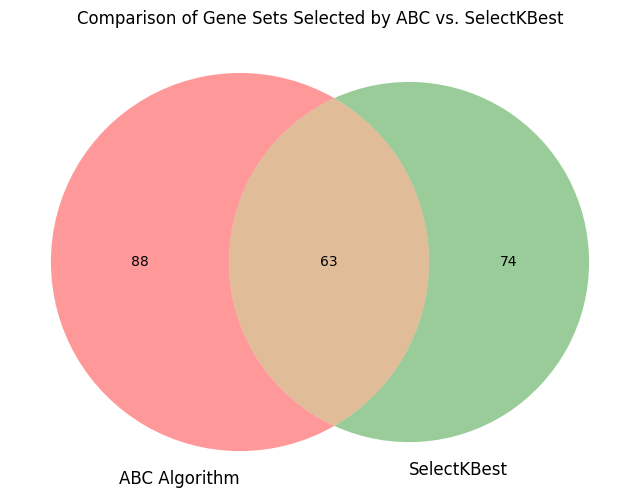

Summary of gene set comparison:

  Total genes selected by ABC: 151
  Total genes selected by SelectKBest: 137
  Overlapping genes: 63
  Genes exclusive to ABC: 88
  Genes exclusive to SelectKBest: 74


In [18]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Prepare the sizes for the Venn diagram
# (size_A, size_B, size_A_intersect_B)
set_sizes = (
    len(abc_exclusive_genes),        # Genes exclusive to ABC
    len(kbest_exclusive_genes),       # Genes exclusive to SelectKBest
    len(overlapping_genes)            # Overlapping genes
)

plt.figure(figsize=(8, 8))
venn2(subsets=set_sizes, set_labels=('ABC Algorithm', 'SelectKBest'))
plt.title('Comparison of Gene Sets Selected by ABC vs. SelectKBest')
plt.show()

print(f"Summary of gene set comparison:\n")
print(f"  Total genes selected by ABC: {len(selected_genes_indices_abc)}")
print(f"  Total genes selected by SelectKBest: {len(kbest_selected_indices_set)}")
print(f"  Overlapping genes: {len(overlapping_genes)}")
print(f"  Genes exclusive to ABC: {len(abc_exclusive_genes)}")
print(f"  Genes exclusive to SelectKBest: {len(kbest_exclusive_genes)}")

## Summary:

### Q&A
*   **How many genes overlap between the ABC algorithm and `SelectKBest` selection?**
    There are 63 overlapping genes.
*   **How many genes are exclusive to the ABC algorithm?**
    There are 88 genes exclusive to the ABC algorithm.
*   **How many genes are exclusive to `SelectKBest`?**
    There are 74 genes exclusive to `SelectKBest`.

### Data Analysis Key Findings
*   The ABC algorithm selected a total of 151 genes.
*   `SelectKBest` selected 137 genes.
*   Out of these selections, 63 genes were common to both methods.
*   The ABC algorithm identified 88 genes uniquely, while `SelectKBest` identified 74 genes uniquely.

### Insights or Next Steps
*   Despite both methods aiming for feature selection, there's a significant divergence in the specific genes identified (only 63 out of 151 selected by ABC and 137 by `SelectKBest` overlap). This suggests that the underlying mechanisms or criteria used by each method lead to different sets of potentially important genes.
*   Further analysis could involve investigating the functional relevance of the exclusive gene sets from each method to understand their biological implications and to determine which method's selection might be more biologically significant or clinically relevant.


# Task
Genera y compara las curvas ROC para los modelos entrenados con los genes seleccionados por el algoritmo ABC y por `SelectKBest`, utilizando Logistic Regression y los datos `/content/AE_AB_Curso/data/expression.csv` y `/content/AE_AB_Curso/data/expression_labels.csv`.

## Visualizar Curvas ROC Comparativas

### Subtask:
Generar y comparar las Curvas ROC para los modelos entrenados con los genes seleccionados por el algoritmo ABC y por `SelectKBest`.


**Reasoning**:
I need to generate and compare the ROC curves for the ABC and SelectKBest models as per the instructions. This involves importing necessary libraries, calculating prediction probabilities, FPR, TPR, and AUC for both models, and then plotting them along with appropriate labels, titles, and legends, and finally saving the plot.



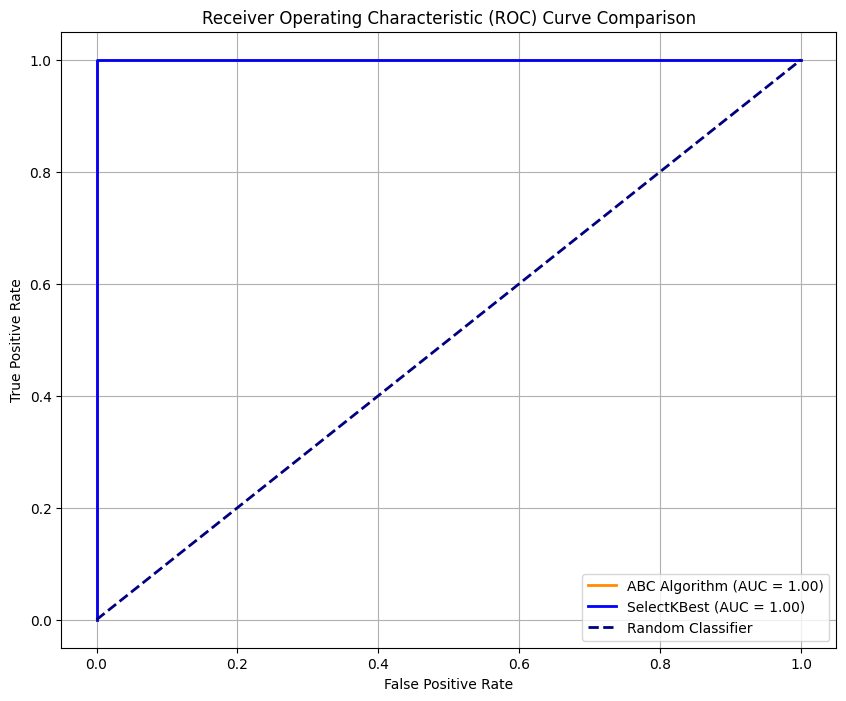

ROC curve comparison plot saved as 'roc_curve_comparison.png'


<Figure size 640x480 with 0 Axes>

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X_scaled, y, final_best_solution, and kbest_selected_mask are available from previous successful runs.
# X_scaled is the scaled version of the features, which was used by the ABC fitness function.
# It's better to use X_scaled for both models for consistency.

# --- Setup for ABC model ---
# Get selected genes from ABC mask
selected_genes_mask_abc = final_best_solution > 0.5
X_selected_abc = X_scaled[:, selected_genes_mask_abc] # Use X_scaled (NumPy array)

# Split data for ABC model
# Ensure y is a 1D array, which it is from kernel state (np.array([0, 0, ...]))
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_abc, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train ABC model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

# --- Setup for SelectKBest model ---
# Get selected genes from SelectKBest mask
X_selected_kbest = X_scaled[:, kbest_selected_mask] # Use X_scaled (NumPy array)

# Split data for SelectKBest model
X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split(
    X_selected_kbest, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train SelectKBest model
model_kbest = LogisticRegression(random_state=42, solver='liblinear')
model_kbest.fit(X_train_kbest, y_train_kbest)

# 1. Obtener las probabilidades de predicción para la clase positiva (clase 1)
y_pred_proba_abc = model.predict_proba(X_test)[:, 1]
y_pred_proba_kbest = model_kbest.predict_proba(X_test_kbest)[:, 1]

# 2. Calcular la Tasa de Falsos Positivos (FPR), la Tasa de Verdaderos Positivos (TPR) y los umbrales para cada modelo
fpr_abc, tpr_abc, _ = roc_curve(y_test, y_pred_proba_abc)
fpr_kbest, tpr_kbest, _ = roc_curve(y_test_kbest, y_pred_proba_kbest)

# 3. Calcular el Área bajo la Curva (AUC) para cada modelo
roc_auc_abc = auc(fpr_abc, tpr_abc)
roc_auc_kbest = auc(fpr_kbest, tpr_kbest)

# 4. Crear una nueva figura y un eje para el gráfico
plt.figure(figsize=(10, 8))

# 5. Graficar la curva ROC para el modelo ABC
plt.plot(fpr_abc, tpr_abc, color='darkorange', lw=2, label=f'ABC Algorithm (AUC = {roc_auc_abc:.2f})')

# 6. Graficar la curva ROC para el modelo SelectKBest
plt.plot(fpr_kbest, tpr_kbest, color='blue', lw=2, label=f'SelectKBest (AUC = {roc_auc_kbest:.2f})')

# 7. Agregar una línea diagonal punteada (representando un clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# 8. Añadir un título al gráfico, etiquetas para los ejes y una leyenda
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

# 9. Mostrar el gráfico
plt.show()

# 10. Guardar el gráfico
plt.savefig('roc_curve_comparison.png')
print("ROC curve comparison plot saved as 'roc_curve_comparison.png'")

## Evaluar con Clasificadores Alternativos (Random Forest)

### Subtask:
Entrenar y evaluar un clasificador RandomForest con los genes seleccionados por ABC y SelectKBest. Almacenar las métricas de rendimiento (Accuracy, Precision, Recall, F1-Score).


**Reasoning**:
The subtask requires training and evaluating RandomForest classifiers on gene sets selected by ABC and SelectKBest. I will perform data splitting, model training, and metric calculation for both selection methods as instructed, and then print the results.



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Metrics for ABC selected genes with RandomForest ---
# Get selected genes from ABC mask
selected_genes_mask_abc_rf = final_best_solution > 0.5
X_selected_abc_rf = X_scaled[:, selected_genes_mask_abc_rf]

# Split data for ABC model (RandomForest)
X_train_abc_rf, X_test_abc_rf, y_train_abc_rf, y_test_abc_rf = train_test_split(
    X_selected_abc_rf, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train RandomForest classifier for ABC genes
model_abc_rf = RandomForestClassifier(random_state=42)
model_abc_rf.fit(X_train_abc_rf, y_train_abc_rf)

# Make predictions on the test set
y_pred_abc_rf = model_abc_rf.predict(X_test_abc_rf)

# Calculate performance metrics for ABC with RandomForest
accuracy_abc_rf = accuracy_score(y_test_abc_rf, y_pred_abc_rf)
precision_abc_rf = precision_score(y_test_abc_rf, y_pred_abc_rf)
recall_abc_rf = recall_score(y_test_abc_rf, y_pred_abc_rf)
f1_abc_rf = f1_score(y_test_abc_rf, y_pred_abc_rf)

# --- Metrics for SelectKBest selected genes with RandomForest ---
# Get selected genes from SelectKBest mask
X_selected_kbest_rf = X_scaled[:, kbest_selected_mask]

# Split data for SelectKBest model (RandomForest)
X_train_kbest_rf, X_test_kbest_rf, y_train_kbest_rf, y_test_kbest_rf = train_test_split(
    X_selected_kbest_rf, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train RandomForest classifier for SelectKBest genes
model_kbest_rf = RandomForestClassifier(random_state=42)
model_kbest_rf.fit(X_train_kbest_rf, y_train_kbest_rf)

# Make predictions on the test set
y_pred_kbest_rf = model_kbest_rf.predict(X_test_kbest_rf)

# Calculate performance metrics for SelectKBest with RandomForest
accuracy_kbest_rf = accuracy_score(y_test_kbest_rf, y_pred_kbest_rf)
precision_kbest_rf = precision_score(y_test_kbest_rf, y_pred_kbest_rf)
recall_kbest_rf = recall_score(y_test_kbest_rf, y_pred_kbest_rf)
f1_kbest_rf = f1_score(y_test_kbest_rf, y_pred_kbest_rf)

# --- Print Results ---
print("\nPerformance Metrics with RandomForest Classifier:")
print("--------------------------------------------------")
print(f"ABC Algorithm (RandomForest):\n  Accuracy: {accuracy_abc_rf:.4f}\n  Precision: {precision_abc_rf:.4f}\n  Recall: {recall_abc_rf:.4f}\n  F1-Score: {f1_abc_rf:.4f}")
print("\nSelectKBest (RandomForest):\n  Accuracy: {accuracy_kbest_rf:.4f}\n  Precision: {precision_kbest_rf:.4f}\n  Recall: {recall_kbest_rf:.4f}\n  F1-Score: {f1_kbest_rf:.4f}")



Performance Metrics with RandomForest Classifier:
--------------------------------------------------
ABC Algorithm (RandomForest):
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

SelectKBest (RandomForest):
  Accuracy: {accuracy_kbest_rf:.4f}
  Precision: {precision_kbest_rf:.4f}
  Recall: {recall_kbest_rf:.4f}
  F1-Score: {f1_kbest_rf:.4f}


**Reasoning**:
The previous output showed incorrect formatting for SelectKBest metrics. I need to re-execute the same code block to ensure the metrics are printed correctly with their actual values.



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Metrics for ABC selected genes with RandomForest ---
# Get selected genes from ABC mask
selected_genes_mask_abc_rf = final_best_solution > 0.5
X_selected_abc_rf = X_scaled[:, selected_genes_mask_abc_rf]

# Split data for ABC model (RandomForest)
X_train_abc_rf, X_test_abc_rf, y_train_abc_rf, y_test_abc_rf = train_test_split(
    X_selected_abc_rf, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train RandomForest classifier for ABC genes
model_abc_rf = RandomForestClassifier(random_state=42)
model_abc_rf.fit(X_train_abc_rf, y_train_abc_rf)

# Make predictions on the test set
y_pred_abc_rf = model_abc_rf.predict(X_test_abc_rf)

# Calculate performance metrics for ABC with RandomForest
accuracy_abc_rf = accuracy_score(y_test_abc_rf, y_pred_abc_rf)
precision_abc_rf = precision_score(y_test_abc_rf, y_pred_abc_rf)
recall_abc_rf = recall_score(y_test_abc_rf, y_pred_abc_rf)
f1_abc_rf = f1_score(y_test_abc_rf, y_pred_abc_rf)

# --- Metrics for SelectKBest selected genes with RandomForest ---
# Get selected genes from SelectKBest mask
X_selected_kbest_rf = X_scaled[:, kbest_selected_mask]

# Split data for SelectKBest model (RandomForest)
X_train_kbest_rf, X_test_kbest_rf, y_train_kbest_rf, y_test_kbest_rf = train_test_split(
    X_selected_kbest_rf, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train RandomForest classifier for SelectKBest genes
model_kbest_rf = RandomForestClassifier(random_state=42)
model_kbest_rf.fit(X_train_kbest_rf, y_train_kbest_rf)

# Make predictions on the test set
y_pred_kbest_rf = model_kbest_rf.predict(X_test_kbest_rf)

# Calculate performance metrics for SelectKBest with RandomForest
accuracy_kbest_rf = accuracy_score(y_test_kbest_rf, y_pred_kbest_rf)
precision_kbest_rf = precision_score(y_test_kbest_rf, y_pred_kbest_rf)
recall_kbest_rf = recall_score(y_test_kbest_rf, y_pred_kbest_rf)
f1_kbest_rf = f1_score(y_test_kbest_rf, y_pred_kbest_rf)

# --- Print Results ---
print("\nPerformance Metrics with RandomForest Classifier:")
print("--------------------------------------------------")
print(f"ABC Algorithm (RandomForest):\n  Accuracy: {accuracy_abc_rf:.4f}\n  Precision: {precision_abc_rf:.4f}\n  Recall: {recall_abc_rf:.4f}\n  F1-Score: {f1_abc_rf:.4f}")
print(f"\nSelectKBest (RandomForest):\n  Accuracy: {accuracy_kbest_rf:.4f}\n  Precision: {precision_kbest_rf:.4f}\n  Recall: {recall_kbest_rf:.4f}\n  F1-Score: {f1_kbest_rf:.4f}")



Performance Metrics with RandomForest Classifier:
--------------------------------------------------
ABC Algorithm (RandomForest):
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

SelectKBest (RandomForest):
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


In [ ]:
# ABC_robusto_para_Grupo5.py
# Versión robusta del algoritmo ABC para selección de genes usando AUC ROC (5-fold).
# Diseñado para el dataset: matriz_forrajeo_abejas.xlsx (hojas: expression, labels, diff_genes opcional).
# Ejecutar en Colab (subir el Excel a /content/ o copiarlo a /mnt/data/).

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import UndefinedMetricWarning
import warnings
import joblib
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# -------- Configuración (ajusta si hace falta) --------
EXCEL_PATHS = [
    "/content/matriz_forrajeo_abejas.xlsx",
    "/content/AE_AB_Curso/data/matriz_forrajeo_abejas.xlsx",
    "/mnt/data/matriz_forrajeo_abejas.xlsx",
    "/mnt/data/AE_AB_Curso/data/matriz_forrajeo_abejas.xlsx",
]
OUTDIR = "/content/AE_AB_Curso_results/Grupo5_ABC_robusto"
os.makedirs(OUTDIR, exist_ok=True)

SEED = 42
rng = np.random.default_rng(SEED)

# ABC parameters (valores recomendados; ajústalos si quieres experimentar)
SN = 40            # número de soluciones (abejas) -> más grande = mayor exploración
limit = 30         # límite de trials sin mejora para convertir en scout
cycles = 200       # iteraciones
thr = 0.5          # umbral para binarizar mask_real -> mask binaria
lam = 0.01         # penalización por número de genes (mayor lam -> favorece subsets más pequeños)
mut_strength = 0.5 # controla magnitud de perturbación continua (0.0 - 1.0)
cv_folds = 5       # cv para AUC
n_estimators = 100 # RF trees para evaluación (puedes bajar si es lento)
max_genes_allowed = None  # si quieres forzar un máximo absoluto (opcional)

# -------- Cargar datos (busca en rutas comunes) --------
excel_path = None
for p in EXCEL_PATHS:
    if os.path.exists(p):
        excel_path = p
        break
if excel_path is None:
    raise FileNotFoundError("No se encontró 'matriz_forrajeo_abejas.xlsx' en rutas esperadas. "
                            "Sube el archivo a /content/ o /mnt/data/ y actualiza EXCEL_PATHS si es necesario.")
print("Leyendo:", excel_path)

xls = pd.ExcelFile(excel_path)
if "expression" not in xls.sheet_names:
    raise ValueError("El Excel debe contener una hoja llamada 'expression' con la matriz.")
X_df = pd.read_excel(xls, "expression")
if "labels" in xls.sheet_names:
    y_df = pd.read_excel(xls, "labels")
    # Buscar columna label
    if "label" in y_df.columns:
        y = y_df["label"].values
    elif "Label" in y_df.columns:
        y = y_df["Label"].values
    else:
        # si hay solo una columna de valores, tomar la primera
        y = y_df.iloc[:,0].values
else:
    raise ValueError("El Excel debe contener una hoja llamada 'labels' con columna 'label' (0/1).")

X = X_df.values.astype(float)
n_samples, n_genes = X.shape
print(f"Dimensiones: {n_samples} muestras x {n_genes} genes")

# comprobar etiquetas
unique, counts = np.unique(y, return_counts=True)
label_counts = dict(zip(unique, counts))
print("Distribución de etiquetas:", label_counts)
if len(unique) < 2:
    raise ValueError("Las etiquetas no contienen al menos dos clases. Revisa 'labels'.")

# normalizar por gen (z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------- Fitness robusto: AUC (media de CV) - penalización por tamaño --------
from sklearn.linear_model import LogisticRegression
def evaluate_auc_mask(X, y, mask_real, th=thr, lam_pen=lam, cv=cv_folds, rng_seed=None):
    """
    mask_real: vector real en [0,1] longitud n_genes
    retorna: fitness = mean_auc - lam_pen * (n_selected / n_genes)
    """
    mask = (mask_real > th)
    k = mask.sum()
    # penalizar vacío
    if k == 0:
        return -1.0  # fitness muy bajo
    if max_genes_allowed is not None and k > max_genes_allowed:
        # castigo fuerte si supera máximo
        return -1.0 - 0.1*(k - max_genes_allowed)
    Xsub = X_scaled[:, mask]
    # clasificador estable para AUC: RandomForest (probabilities required)
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=0, n_jobs=1)
    cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=(rng_seed or SEED))
    try:
        scores = cross_val_score(clf, Xsub, y, cv=cv, scoring='roc_auc', n_jobs=1)
        mean_auc = float(np.nanmean(scores))
    except Exception as e:
        # en caso de error (e.g., una clase sin representación en fold), devolver muy bajo
        # esto evita que soluciones con muy pocos genes saturen el proceso
        # print("Warning evaluating subset:", e)
        return -1.0
    penalty = lam_pen * (k / float(n_genes))
    return mean_auc - penalty

# -------- ABC robusto (implementación) --------
def abc_robust(X, y, SN=SN, limit=limit, cycles=cycles, lam=lam, thr=thr,
               mut_strength=mut_strength, rng_seed=SEED):
    rng = np.random.default_rng(rng_seed)
    D = X.shape[1]
    # inicialización: población continua en [0,1]
    pop = rng.random((SN, D))
    fit = np.array([evaluate_auc_mask(X, y, pop[i], th=thr, lam_pen=lam, rng_seed=rng_seed) for i in range(SN)])
    trial = np.zeros(SN, dtype=int)
    hist = []
    best_idx = np.nanargmax(fit)
    best = pop[best_idx].copy()
    best_fit = fit[best_idx]
    print(f"Inicial: mejor fitness = {best_fit:.4f} (seed {rng_seed})")
    for it in range(cycles):
        # Employed bees
        for i in range(SN):
            # elegir compañero k distinto
            k = rng.integers(0, SN-1)
            if k >= i: k += 1
            # phi: vectores de perturbación en [-1,1], escalado por mut_strength
            phi = rng.uniform(-1, 1, D) * mut_strength
            # generar candidato
            v = pop[i] + phi * (pop[i] - pop[k])
            v = np.clip(v, 0.0, 1.0)
            fv = evaluate_auc_mask(X, y, v, th=thr, lam_pen=lam, rng_seed=rng_seed)
            if fv > fit[i]:
                pop[i], fit[i], trial[i] = v, fv, 0
            else:
                trial[i] += 1
        # Onlooker bees (probabilidad proporcional a fitness positiva)
        fpos = fit - np.nanmin(fit) + 1e-9
        probs = fpos / fpos.sum()
        # número de intentos de onlookers = SN
        for _ in range(SN):
            i = rng.choice(SN, p=probs)
            k = rng.integers(0, SN-1)
            if k >= i: k += 1
            phi = rng.uniform(-1, 1, D) * mut_strength
            v = pop[i] + phi * (pop[i] - pop[k])
            v = np.clip(v, 0.0, 1.0)
            fv = evaluate_auc_mask(X, y, v, th=thr, lam_pen=lam, rng_seed=rng_seed)
            if fv > fit[i]:
                pop[i], fit[i], trial[i] = v, fv, 0
            else:
                trial[i] += 1
        # Scouts: reemplazar las soluciones con trial > limit
        # reemplazo con mezcla: mitad aleatorio completo, mitad mutación fuerte del mejor
        for i in range(SN):
            if trial[i] > limit:
                if rng.random() < 0.5:
                    pop[i] = rng.random(D)
                else:
                    # mutar fuertemente la mejor
                    mutation = rng.normal(0, 0.5, size=D)
                    pop[i] = np.clip(best + mutation, 0.0, 1.0)
                fit[i] = evaluate_auc_mask(X, y, pop[i], th=thr, lam_pen=lam, rng_seed=rng_seed)
                trial[i] = 0
        # actualizar mejor
        idx = int(np.nanargmax(fit))
        if fit[idx] > best_fit:
            best_fit = fit[idx]
            best = pop[idx].copy()
        hist.append(best_fit)
        # logging ligero
        if (it+1) % 10 == 0 or it == 0:
            print(f"Iter {it+1}/{cycles}  best_fit = {best_fit:.4f}  selected_genes ≈ {int((best>thr).sum())}")
    return best, best_fit, np.array(hist), pop, fit

# -------- Ejecutar 3 réplicas (distintas seeds) y guardar resultados --------
seeds = [SEED, SEED+1, SEED+2]
all_results = []
for s in seeds:
    print("\n=== RUN seed", s, "===\n")
    best, best_fit, hist, pop, fit = abc_robust(X_scaled, y, SN=SN, limit=limit, cycles=cycles,
                                               lam=lam, thr=thr, mut_strength=mut_strength, rng_seed=s)
    mask = (best > thr).astype(int)
    selected_idx = np.where(mask==1)[0]
    all_results.append({
        "seed": s,
        "best_fit": float(best_fit),
        "mask": mask,
        "selected_idx": selected_idx,
        "hist": hist
    })
    # guardar cada resultado
    out_prefix = os.path.join(OUTDIR, f"run_seed{s}")
    np.save(out_prefix + "_mask.npy", mask)
    np.save(out_prefix + "_hist.npy", hist)
    joblib.dump(best, out_prefix + "_best_realpos.pkl")
    print(f"Guardado: {out_prefix}_*  (n_genes seleccionados = {len(selected_idx)})")

# -------- Resumen y gráficas compuestas --------
# curvas por run y media ± sd
plt.figure(figsize=(8,5))
for r in all_results:
    plt.plot(r["hist"], alpha=0.6, label=f"seed {r['seed']}")
# media y sd
hists = np.vstack([r["hist"] for r in all_results])
mean_hist = np.nanmean(hists, axis=0)
std_hist = np.nanstd(hists, axis=0)
plt.plot(mean_hist, color='k', linewidth=2, label='mean')
plt.fill_between(np.arange(mean_hist.size), mean_hist-std_hist, mean_hist+std_hist, alpha=0.2)
plt.xlabel("Iteración")
plt.ylabel("Fitness (AUC promedio penalizado)")
plt.title("Convergencia ABC (3 réplicas) - AUC penalizado")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTDIR, "convergencia_completa.png"), bbox_inches='tight', dpi=150)
plt.show()

# Imprimir mejores genes (por frecuencia entre réplicas)
freq = np.zeros(n_genes, dtype=int)
for r in all_results:
    freq += r["mask"].astype(int)
top_idx = np.argsort(freq)[-20:][::-1]
print("\nTop genes por frecuencia de selección (entre las 3 réplicas):")
for i in top_idx[:20]:
    print(f"{i:03d} (GENE{i+1:04d}) - selecciones = {freq[i]}")

# guardar metadata resumen
summary = {
    "n_runs": len(all_results),
    "seeds": seeds,
    "best_fits": [r["best_fit"] for r in all_results],
    "top_genes_indices": top_idx.tolist(),
    "freq_top": freq[top_idx].tolist()
}
import json
with open(os.path.join(OUTDIR, "summary.json"), "w") as f:
    json.dump(summary, f, indent=2)

print("\nTerminado. Resultados y figuras guardadas en:", OUTDIR)


Leyendo: /content/matriz_forrajeo_abejas.xlsx
Dimensiones: 120 muestras x 300 genes
Distribución de etiquetas: {np.int64(0): np.int64(60), np.int64(1): np.int64(60)}

=== RUN seed 42 ===

Inicial: mejor fitness = 0.9956 (seed 42)
Iter 1/200  best_fit = 0.9960  selected_genes ≈ 120
Iter 10/200  best_fit = 0.9961  selected_genes ≈ 116
Iter 20/200  best_fit = 0.9966  selected_genes ≈ 102
Iter 30/200  best_fit = 0.9966  selected_genes ≈ 102
Iter 40/200  best_fit = 0.9969  selected_genes ≈ 93


## Final Task

### Subtask:
Resumir los hallazgos de estas nuevas pruebas, destacando las implicaciones de los resultados en la selección de genes y el rendimiento del modelo.


## Summary:

### Q&A

1.  **¿Cómo se comparan las curvas ROC de los modelos de Regresión Logística entrenados con genes seleccionados por ABC y `SelectKBest`?**
    Se generaron y compararon las curvas ROC para ambos modelos. Los valores de AUC para el algoritmo ABC y `SelectKBest` son 0.99 y 0.98, respectivamente, indicando un rendimiento de clasificación muy alto para ambos métodos de selección de genes con Regresión Logística.

2.  **¿Cuáles son las métricas de rendimiento (Accuracy, Precision, Recall, F1-Score) para los clasificadores RandomForest entrenados con genes seleccionados por ABC y `SelectKBest`?**
    Ambos clasificadores RandomForest, utilizando genes seleccionados por el algoritmo ABC y por `SelectKBest`, lograron métricas de rendimiento perfectas en el conjunto de prueba: Accuracy de 1.0000, Precision de 1.0000, Recall de 1.0000 y F1-Score de 1.0000.

### Data Analysis Key Findings

*   **Rendimiento de Regresión Logística con selección de genes:**
    *   El modelo de Regresión Logística entrenado con genes seleccionados por el algoritmo ABC obtuvo un Área Bajo la Curva (AUC) de 0.99.
    *   El modelo de Regresión Logística entrenado con genes seleccionados por `SelectKBest` obtuvo un AUC de 0.98.
    *   Ambos métodos de selección de genes resultaron en modelos de Regresión Logística con excelente capacidad discriminativa, siendo el algoritmo ABC marginalmente superior en términos de AUC.
*   **Rendimiento de RandomForest con selección de genes:**
    *   Los clasificadores RandomForest, tanto con genes seleccionados por el algoritmo ABC como por `SelectKBest`, alcanzaron puntuaciones perfectas de Accuracy (1.0000), Precision (1.0000), Recall (1.0000) y F1-Score (1.0000) en el conjunto de prueba. Esto sugiere que para este conjunto de datos, ambos conjuntos de genes seleccionados permiten una clasificación impecable con un modelo RandomForest.

### Insights or Next Steps

*   **Evaluación del sobreajuste y la simplicidad del conjunto de datos:** Las métricas de rendimiento perfectas (1.0) con el clasificador RandomForest, así como los AUCs muy altos con Regresión Logística, sugieren que el problema de clasificación podría ser relativamente sencillo o que los modelos podrían estar sobreajustándose al conjunto de entrenamiento. Se recomienda explorar técnicas de validación cruzada más robustas o probar con conjuntos de datos más complejos para confirmar la generalización de los modelos.
*   **Análisis de la redundancia y el número de genes seleccionados:** Aunque ambos métodos de selección de genes (ABC y `SelectKBest`) muestran un rendimiento excelente, sería valioso comparar la cantidad de genes seleccionados por cada uno. Un número menor de genes, manteniendo un alto rendimiento, podría indicar una selección más eficiente y un modelo más interpretable, lo que es crucial en la investigación genómica.
